# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕 Supreme Team 🚀</p>


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter #formatting values 1e6 to actual
import seaborn as sns
# from sklearn.impute import KNNImputer
pd.set_option('display.max_columns',None)
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from optbinning import OptimalBinning
from optbinning import BinningProcess
from optbinning import Scorecard

from sklearn.preprocessing import KBinsDiscretizer,LabelEncoder
import random
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.decomposition import PCA
import lightgbm as lgb
import xgboost as xgb
import optuna   
import sklearn
import warnings
warnings.filterwarnings('ignore')
from catboost import CatBoostClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score,plot_roc_curve,f1_score,recall_score,precision_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from optuna.samplers import TPESampler
from skopt import BayesSearchCV
import pickle
# !pip install --upgrade seaborn matplotlib
# !pip install fastparquet
# !pip install optuna
# !pip install shap numpy scikit-learn
# !pip install git+https://github.com/slundberg/shap.git
# !pip install optbinning
# !pip install scikit-optimize

(CVXPY) Aug 14 06:26:48 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Aug 14 06:26:48 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Reading data</p>


In [2]:
df = pd.read_parquet('multisimmers.parquet')
df.head()

subscriber_id  trf age gndr  tenure var_5  dev_man device_os_name var_8  \
0  6961546617278    2  64    M  6384.0  1507  Samsung     Android OS     1   
1  6961536724304   16  35    M  6180.0   565  Samsung     Android OS     1   
2  6961523183000    0  26    M  1534.0  1078  Samsung     Android OS     1   
3  6961605994099    2  36    M  3925.0  1219   Xiaomi     Android OS     1   
4  6961591989199    0  38    M   321.0   145  Samsung     Android OS     1   

  is_dualsim is_featurephone is_smartphone simcard_type  var_13  var_14  \
0          1               0             1           4G   298.0   678.0   
1          1               0             1         None   484.0   998.0   
2          1               0             1           4G     7.0    11.0   
3          1               0             1           3G  1053.0  2176.0   
4          1               0             1           4G    33.0    77.0   

   var_15  var_16  var_17  var_18  var_19  var_20  var_21  var_22  var_23  \
0  1080.0  2008.0   276.2   669.2   978.5  1892.6   74.50   84.75   90.00   
1  1559.0  3072.0   668.9  1285.6  2139.7  4185.6  121.00  124.75  129.92   
2    41.0   117.0     4.5    29.5   123.6   352.2    1.75    1.38    3.42   
3  2981.0  6257.0  1692.9  3636.4  5030.7  9425.8  263.25  272.00  248.42   
4   135.0   286.0    40.2    87.7   156.8   280.7    8.25    9.63   11.25   

   var_24  var_25  var_26  var_27  var_28  var_29  var_30  var_31  var_32  \
0   83.67     0.9     1.0     0.9     0.9   112.0   281.0   485.0   912.0   
1  128.00     1.4     1.3     1.4     1.4   245.0   526.0   806.0  1643.0   
2    4.88     0.6     2.7     3.0     3.0     0.0     0.0     2.0     8.0   
3  260.71     1.6     1.7     1.7     1.5   622.0  1258.0  1665.0  3644.0   
4   11.92     1.2     1.1     1.2     1.0     4.0     5.0    18.0    49.0   

   var_33  var_34  var_35  var_36  var_37  var_38  var_39  var_40  var_41  \
0   127.0   299.3   455.8   913.0   28.00   35.13   40.42   38.00     1.1   
1   302.5   631.0  1017.0  2132.2   61.25   65.75   67.17   68.46     1.2   
2     0.0     0.0     1.0     7.4    0.00    0.00    0.17    0.33     0.0   
3  1000.1  2171.4  2808.2  5485.2  155.50  157.25  138.75  151.83     1.6   
4     3.7     4.2    19.4    41.1    1.00    0.63    1.50    2.04     0.9   

   var_42  var_43  var_44  var_45  var_46  var_47  var_48  var_49  var_50  \
0     1.1     0.9     1.0     4.0     9.0    13.0    24.0     4.5     8.0   
1     1.2     1.3     1.3    19.0    58.0    86.0   156.0    21.5    66.4   
2     0.0     0.5     0.9     1.0     1.0     9.0     9.0     0.5     0.5   
3     1.7     1.7     1.5    38.0    72.0    89.0   176.0    40.8    84.4   
4     0.8     1.1     0.8    17.0    41.0    60.0   137.0    29.5    58.3   

   var_51  var_52  var_53  var_54  var_55  var_56  var_57  var_58  var_59  \
0    10.5    22.2    1.00    1.13    1.08    1.00     1.1     0.9     0.8   
1   108.2   193.5    4.75    7.25    7.17    6.50     1.1     1.1     1.3   
2     6.2     6.2    0.25    0.13    0.75    0.38     0.5     0.5     0.7   
3    94.8   178.1    9.50    9.00    7.42    7.33     1.1     1.2     1.1   
4    85.9   151.5    4.25    5.13    5.00    5.71     1.7     1.4     1.4   

   var_60  var_61  var_62  var_63  var_64   var_65   var_66   var_67   var_68  \
0     0.9    40.0    93.0   152.0   272.0   396.36   710.90   831.14  1014.69   
1     1.2    34.0    70.0   116.0   242.0    53.85  2247.46  4182.41  9356.48   
2     0.7    63.0    82.0   133.0   242.0  1913.52  2041.40  2849.79  3227.02   
3     1.0   122.0   312.0   455.0   958.0     0.00     0.00     0.00     0.00   
4     1.1    23.0    62.0   101.0   220.0     0.00     0.00     0.00     0.00   

   var_69  var_70  var_71  var_72  region  var_74  var_75  var_76  var_77  \
0   11.33   25.36   35.68   62.64       1     0.0     NaN     5.2    12.0   
1   10.01   30.00   51.98   97.54       0     0.0     NaN    12.2    10.0   
2    5.17    6.22   10.73   14.03       1     2.6 

subscirber_id	id of costumer

trf	Label encoded colum of subscriber tariff

gndr	Gender of subscriber

age	age of subscriber

is_smartphone	0 or 1

operation system	Andriod, IOS, ect

sim_card_type	technology type of simcard

dvice Samsung,APPLE,Mi ect

target	0 -one sim  1 - subscriber have more than one sim

In [3]:
df.describe()

subscriber_id           trf        tenure        var_13        var_14  \
count   5.283500e+04  52835.000000  52825.000000  52835.000000  52835.000000   
mean    6.961561e+12      4.257859   4041.181354    224.996423    442.917479   
std     1.081522e+08      5.064521   2603.957354    314.310271    608.352680   
min     6.961514e+12      0.000000      1.000000      0.000000      0.000000   
25%     6.961527e+12      1.000000   1462.000000     48.000000    102.000000   
50%     6.961542e+12      2.000000   4102.000000    120.000000    240.000000   
75%     6.961561e+12      7.000000   6433.000000    266.000000    522.000000   
max     6.964988e+12     21.000000   8343.000000   7280.000000  14424.000000   

             var_15        var_16        var_17        var_18        var_19  \
count  52835.000000  52835.000000  52835.000000  52835.000000  52835.000000   
mean     668.250610   1374.149295    353.320706    700.199288   1055.261450   
std      907.846711   1847.512714    569.470841   1097.907529   1622.605202   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      160.000000    343.000000     64.400000    140.150000    224.200000   
50%      367.000000    757.000000    166.000000    340.800000    523.400000   
75%      789.000000   1614.000000    397.250000    785.000000   1189.250000   
max    21558.000000  45937.000000  15206.200000  28456.000000  45836.200000   

             var_20        var_21        var_22        var_23        var_24  \
count  52835.000000  52835.000000  52835.000000  52835.000000  52835.000000   
mean    2142.875183     56.249106     55.367163     55.687557     57.257055   
std     3212.529200     78.577568     76.044082     75.653897     76.979699   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      479.200000     12.000000     12.750000     13.330000     14.290000   
50%     1088.000000     30.000000     30.000000     30.580000     31.540000   
75%     2419.500000     66.500000     65.250000     65.750000     67.250000   
max    87405.700000   1820.000000   1803.000000   1796.500000   1914.040000   

             var_25        var_26        var_27        var_28        var_29  \
count  52835.000000  52835.000000  52835.000000  52835.000000  52835.000000   
mean       1.707737      1.721694      1.720481      1.701459     82.790574   
std        1.567749      1.457259      1.367839      1.275767    165.014705   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.900000      1.000000      1.000000      1.000000      3.000000   
50%        1.300000      1.300000      1.300000      1.300000     25.000000   
75%        1.900000      2.000000      2.000000      1.900000     80.000000   
max       48.200000     48.200000     27.200000     25.700000   2548.000000   

             var_30        var_31        var_32        var_33        var_34  \
count  52835.000000  52835.000000  52835.000000  52835.000000  52835.000000   
mean     162.813987    245.428163    506.305214    149.036411    295.145224   
std      318.984025    475.244042    969.377618    393.250058    758.907230   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000     19.000000     47.000000      3.200000     12.200000   
50%       52.000000     82.000000    171.000000     31.400000     68.200000   
75%      158.000000    237.000000    485.000000    115.000000    227.100000   
max     5060.000000   7491.000000  18394.000000  12153.200000  22001.000000   

             var_35        var_36        var_37        var_38        var_39  \
count  52835.000000  52835.000000  52835.000000  52835.000000  52835.000000   
mean     444.225886    903.787440     20.697644     20.354003     20.452317   
std     1120.331270   2215.775247     41.253676     39.873133     39.603686   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       23.100000     58.750000      0.75

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52835 entries, 0 to 52834
Columns: 212 entries, subscriber_id to is_bundle_trf
dtypes: category(3), float64(136), int16(1), int32(1), int64(54), int8(1), object(16)
memory usage: 83.5+ MB


In [5]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().sum())

Rows     :  52835
Columns  :  212

Features : 
 ['subscriber_id', 'trf', 'age', 'gndr', 'tenure', 'var_5', 'dev_man', 'device_os_name', 'var_8', 'is_dualsim', 'is_featurephone', 'is_smartphone', 'simcard_type', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'region', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91',

## Dropping columns based on frequencies

In [6]:
value_frequencies = df.apply(lambda col: col.value_counts(normalize=True).max())
# Identify columns with more than 90% of the same value
high_freq_columns = value_frequencies[value_frequencies > 0.9].index.tolist()
# Delete identified high frequency columns
df_filtered = df.drop(columns=high_freq_columns)

In [7]:
value_frequencies.sort_values(ascending=False).reset_index().head(10)

index         0
0  var_178  1.000000
1  var_104  1.000000
2  var_200  1.000000
3  var_116  1.000000
4  var_156  1.000000
5  var_133  0.999716
6  var_112  0.999659
7   var_85  0.996290
8   var_89  0.996025
9   var_93  0.996025

In [8]:
df.shape

(52835, 212)

In [9]:
df_filtered.shape

(52835, 171)

In [10]:
df=df_filtered

In [11]:
del df_filtered

### As we can see, the number of columns have been reduced from 212 to 171

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Missing values</p>


<h3>We just need to look at which columns contain missing values

In [12]:
# % null value in each column
missing_percentages = round(df.isnull().sum() / df.shape[0] * 100.0, 2)

# Print columns with missing value percentages greater than 0
for column, percentage in missing_percentages.items():
    if percentage > 0:
        print(f"'{column}' has missing values: {percentage}%")

'age' has missing values: 0.47%
'tenure' has missing values: 0.02%
'dev_man' has missing values: 0.08%
'device_os_name' has missing values: 0.08%
'simcard_type' has missing values: 7.01%
'var_74' has missing values: 0.02%
'var_75' has missing values: 98.65%
'var_76' has missing values: 0.77%


<h3>There is a 'var_75' column in dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

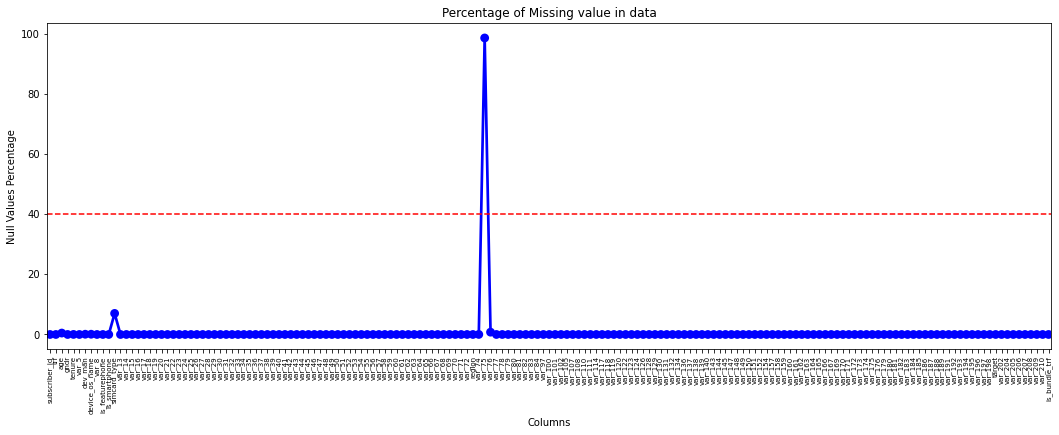

In [13]:
null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing value in data")
plt.ylabel("Null Values Percentage")
plt.xlabel("Columns")
plt.show()

In [14]:
# 'var_75' can be dropped because it has 98% null values and subscriber id is not necessary column
df.drop(columns=['subscriber_id','var_75'],inplace=True)

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Filling null values</p>


<h1>Why we haven't used imputer techniques? like KNNImputer</h1>

<span style="font-size: larger;">KNN Imputation Drawbacks</span>

---

- KNN imputation involves calculating distances between data points, which can become <span style="font-size: larger; color: red;">computationally intensive for large datasets</span>. As the dataset size increases, the <span style="font-size: larger; color: red;">time complexity of KNN imputation grows</span>, making it less efficient.

---

- KNN imputation can be <span style="font-size: larger; color: red;">sensitive to noise and outliers in the data</span>. If the dataset contains noisy or outlier-prone features, KNN imputation might lead to <span style="font-size: larger; color: red;">inaccurate imputed values</span>.

---

- KNN imputation can suffer from the "<span style="font-size: larger; color: red;">curse of dimensionality</span>," where the effectiveness of the algorithm diminishes as the number of dimensions (features) increases. In high-dimensional spaces, it becomes harder to find <span style="font-size: larger; color: red;">meaningful neighbors</span>, and the imputed values may not be accurate.

---

- The parameter <span style="font-size: larger; color: red;">k</span>, which represents the number of neighbors to consider, needs to be chosen carefully. A <span style="font-size: larger; color: red;">small k</span> might lead to imputed values that are strongly influenced by noise, while a <span style="font-size: larger; color: red;">large k</span> might lead to imputed values that are too general.

---

- KNN imputation assumes that <span style="font-size: larger; color: red;">similar values correspond to similar patterns</span>. However, if missing values are not missing at random but follow a specific pattern, this assumption might not hold.


### Checking which columns have null values and analyzing them seperately

In [15]:
 df.columns[df.isnull().any()].tolist()

['age',
 'tenure',
 'dev_man',
 'device_os_name',
 'is_featurephone',
 'is_smartphone',
 'simcard_type',
 'var_74',
 'var_76']

### Deleting rows that have at least 2 NaN values

In [16]:
df.dropna(thresh=df.shape[1] - 2, inplace=True)

### Age filling null values

In [18]:
df.age.fillna(0, inplace= True)
# temporarily filling NaN values with 0 
df.age = df.age.astype('int32')
# converting age column from object datatype to integer

In [19]:
fig = px.scatter(df, x='age', y='gndr', color='age', color_continuous_scale='Viridis',
                 title='Scatter Plot for Age by Gender')
fig.update_traces(marker=dict(size=12, opacity=0.7))
fig.show()

<h3>So, we can see that most of the outliers is in 'M' gender

In [21]:
df.loc[df.age > 1900, 'age'] = 2021 - df.loc[df.age > 1900, 'age'].values
# replacing all ages that were messed up with a year

df.loc[(df['age'] > 90) | (df['age'] < 10), 'age'] = 0
# also reassigning this values to zero, because they are rare and can be outliers that will damage our model 

df.loc[df.age == 0, 'age'] = int(df.age.mean())
#filling zero values with mean value that equals to 44

In [22]:
df.age.isna().sum()

0

In [23]:
fig = px.scatter(df, x='age', y='gndr', color='age', color_continuous_scale='Viridis',
                 title='Scatter Plot for Age by Gender')
fig.update_traces(marker=dict(size=12, opacity=0.7))
fig.show()

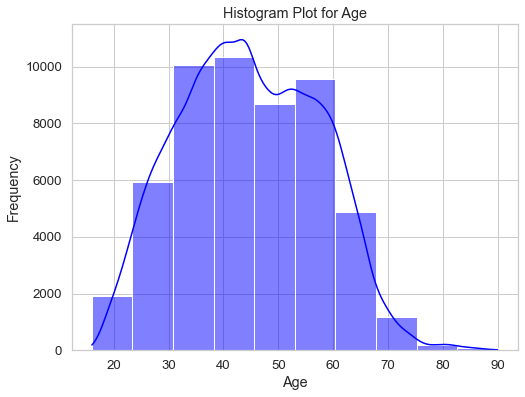

In [24]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
# Create a histogram plot for the age column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=10, kde=True, color='blue')
# Add title and labels
plt.title("Histogram Plot for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Define bin edges
bin_edges = [10, 20, 35, 55, 65, 75, 90]
# Create bins using cut() function
df['age_bins'] = pd.cut(df['age'], bins=bin_edges, labels=['10-20', '20-35', '35-55','55-65','65-75','75-90'])
df.drop(columns='age',inplace=True)

In [26]:
df.age_bins.value_counts()

35-55    26863
20-35    13150
55-65     9924
65-75     2010
10-20      611
75-90      263
Name: age_bins, dtype: int64

### var_76 filling null values

In [27]:
df[df.var_76.isna()]

trf gndr  tenure var_5        dev_man device_os_name var_8  \
62       0    M   701.0   183        Samsung     Android OS     1   
93       0    M   390.0   246        Samsung     Android OS     1   
295      0    M  1647.0     2         Huawei     Android OS     2   
374      0    M  5154.0   588        Samsung     Android OS     1   
428      2    M  2375.0    63  Hmd Global Oy    Proprietary     1   
...    ...  ...     ...   ...            ...            ...   ...   
52153    9    F  7750.0   995        Samsung     Android OS     1   
52416    2    M   349.0   135        Samsung     Android OS     1   
52570    2    M   241.0   239         Xiaomi     Android OS     1   
52707    2    M  1796.0   993        Samsung     Android OS     1   
52741    1    M  6766.0   458         Xiaomi     Android OS     1   

      is_featurephone is_smartphone simcard_type  var_13  var_14  var_15  \
62                  0             1           4G    64.0   112.0   148.0   
93                  0             1           4G    17.0    46.0    54.0   
295                 0             1           4G    13.0    39.0    43.0   
374                 0             1           3G    38.0    93.0   137.0   
428                 1             0           3G     2.0    16.0    32.0   
...               ...           ...          ...     ...     ...     ...   
52153               0             1           4G    15.0    30.0    44.0   
52416               0             1           4G     1.0     4.0     5.0   
52570               0             1           4G     4.0    23.0    35.0   
52707               0             1           3G   186.0   376.0   577.0   
52741               0             1           3G    13.0    24.0    31.0   

       var_16  var_17  var_18  var_19  var_20  var_21  var_22  var_23  var_24  \
62      292.0   200.7   358.2   512.3   870.0   16.00   14.00   12.33   12.17   
93      101.0     8.1    30.2    35.8    68.0    4.25    5.75    4.50    4.21   
295      62.0     7.6    30.8    42.4    57.2    3.25    4.88    3.58    2.58   
374     244.0    21.2    65.4    95.1   171.8    9.50   11.63   11.42   10.17   
428     165.0     4.3    34.3    53.9   358.7    0.50    2.00    2.67    6.88   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52153    94.0    17.8    72.9    91.4   165.4    3.75    3.75    3.67    3.92   
52416     9.0     0.4     3.1     3.3     4.5    0.25    0.50    0.42    0.38   
52570   113.0     1.5    36.8    59.8   169.7    1.00    2.88    2.92    4.71   
52707  1214.0   335.1   894.0  1241.6  2046.5   46.50   47.00   48.08   50.58   
52741    80.0    13.4    26.4    45.5   134.3    3.25    3.00    2.58    3.33   

       var_25  var_26  var_27  var_28  var_29  var_30  var_31  var_32  var_33  \
62        3.1     3.2     3.5     3.0     0.0     0.0     0.0     0.0     0.0   
93        0.5     0.7     0.7     0.7     0.0     0.0     0.0     0.0     0.0   
295       0.6     0.8     1.0     0.9     0.0     0.0     0.0     0.0     0.0   
374       0.6     0.7     0.7     0.7     1.0     1.0     1.0     4.0     0.4   
428       2.1     2.1     1.7     2.2     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52153     1.2     2.4     2.1     1.8     7.0    11.0    11.0    26.0    10.4   
52416     0.4     0.8     0.7     0.5     0.0     0.0     0.0     0.0     0.0   
52570     0.4     1.6     1.7     1.5     0.0     0.0     0.0     0.0     0.0   
52707     1.8     2.4     2.2     1.7    17.0    36.0    62.0   135.0    17.0   
52741     1.0     1.1     1.5     1.7     0.0     0.0     0.0     1.0     0.0   

       var_34  var_35  var_36  var_37  var_38  var_39  var_40  var_41  var_42  \
62        0.0     0.0     0.0    0.00    0.00    0.00    0.00     0.0     0.0   
93        0.0     0.0     0.0    0.00    0.00    0.00    0.00     0.0     0.0   
295       0.0     0.0     0.0    0.00    0.00    0.00    0.00     0.0     0.

<Axes: >

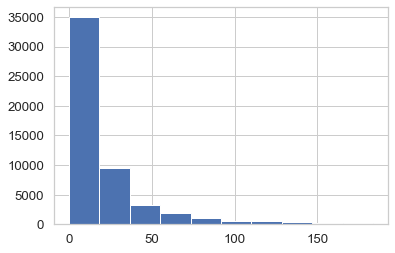

In [28]:
df.var_76.hist()

In [29]:
df.var_76.fillna(df.var_76.mode()[0], inplace=True)
# Best filling with this type of distribution is mode, 
# because we don't affect data like it happens if we fill by mean values

### dev_man filling null values

In [30]:
df[df.dev_man.isna()].head()

trf gndr  tenure var_5 dev_man device_os_name var_8 is_featurephone  \
203     0    M  1877.0     0    None           None     0               1   
2626   16    M  2576.0     0    None           None     0               1   
3854   16    F  2326.0     0    None           None     0               1   
5697    3    F   766.0     0    None           None     0               1   
8967    5    M  3871.0     0    None           None     0               1   

     is_smartphone simcard_type  var_13  var_14  var_15  var_16  var_17  \
203              0           4G     0.0     0.0   210.0   843.0     0.0   
2626             0           4G     0.0     0.0     0.0     0.0     0.0   
3854             0           4G     0.0    56.0   113.0   435.0     0.0   
5697             0           4G     0.0    30.0    86.0   284.0     0.0   
8967             0           4G     0.0    29.0    68.0   304.0     0.0   

      var_18  var_19  var_20  var_21  var_22  var_23  var_24  var_25  var_26  \
203      0.0   217.7  1060.6     0.0    0.00   17.50   35.13     0.0     0.0   
2626     0.0     0.0     0.0     0.0    0.00    0.00    0.00     0.0     0.0   
3854   112.1   211.3   833.4     0.0    7.00    9.42   18.13     0.0     2.0   
5697    30.8    72.7   219.5     0.0    3.75    7.17   11.83     0.0     1.0   
8967    22.2    76.3   426.4     0.0    3.63    5.67   12.67     0.0     0.8   

      var_27  var_28  var_29  var_30  var_31  var_32  var_33  var_34  var_35  \
203      1.0     1.3     0.0     0.0    35.0    67.0     0.0     0.0    34.7   
2626     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3854     1.9     1.9     0.0    14.0    32.0   134.0     0.0    58.8   105.2   
5697     0.8     0.8     0.0     0.0    10.0    24.0     0.0     0.0     6.1   
8967     1.1     1.4     0.0     7.0    20.0   149.0     0.0     6.0    24.5   

      var_36  var_37  var_38  var_39  var_40  var_41  var_42  var_43  var_44  \
203     70.2     0.0    0.00    2.92    2.79     0.0     0.0     1.0     1.0   
2626     0.0     0.0    0.00    0.00    0.00     0.0     0.0     0.0     0.0   
3854   306.4     0.0    1.75    2.67    5.58     0.0     4.2     3.3     2.3   
5697    16.2     0.0    0.00    0.83    1.00     0.0     0.0     0.6     0.7   
8967   204.9     0.0    0.88    1.67    6.21     0.0     0.9     1.2     1.4   

      var_45  var_46  var_47  var_48  var_49  var_50  var_51  var_52  var_53  \
203      0.0     0.0    18.0   149.0     0.0     0.0    12.3   142.0     0.0   
2626     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3854     0.0    25.0    42.0   156.0     0.0    39.5    55.4   179.7     0.0   
5697     0.0    10.0    22.0    55.0     0.0    14.6    31.8    54.8     0.0   
8967     0.0     4.0     6.0    20.0     0.0     2.0     2.4    12.0     0.0   

      var_54  var_55  var_56  var_57  var_58  var_59  var_60  var_61  var_62  \
203     0.00    1.50    6.21     0.0     0.0     0.7     1.0     0.0     1.0   
2626    0.00    0.00    0.00     0.0     0.0     0.0     0.0     0.0     0.0   
3854    3.13    3.50    6.50     0.0     1.6     1.3     1.2     0.0    22.0   
5697    1.25    1.83    2.29     0.0     1.5     1.4     1.0     0.0   172.0   
8967    0.50    0.50    0.83     0.0     0.5     0.4     0.6     0.0    66.0   

      var_63  var_64  var_65   var_66    var_67    var_68  var_69  var_70  \
203   1336.0  3843.0     0.0   464.78  23741.05  65993.82    7.82   44.26   
2626     0.0     0.0     0.0     0.00      0.00      0.00   16.40   18.40   
3854    27.0    93.0     0.0  1120.57   1765.14   6196.19    2.64   14.94   
5697   470.0  1150.0     0.0  1889.23   4234.65  14524.68    6.50   16.48   
8967   126.0   352.0     0.0  1666.46   3803.75  11862.66   18.09   24.97   

      var_71  var_72  region  var_74  var_76  var_77  var_78  var_79  var_80  \
203   100.88  223.81      52    44.1     6.6    5.00   30.25   97.25  196.25   
2626   30.15   43.77      52     1.3     5.6   16.00   20.00   2

In [31]:
df[df.dev_man.isna()].shape

(28, 169)

In [32]:
df.dev_man.value_counts()

Samsung                               26931
Xiaomi                                12912
Nokia                                  2583
Hmd Global Oy                          2334
Apple                                  2303
                                      ...  
Ericsson                                  1
Quectel Wireless                          1
Hong Kong Joyful Import and Export        1
Hong Kong Ema                             1
Longcheer                                 1
Name: dev_man, Length: 166, dtype: int64

the number of unique values is 166

In [33]:
df.dev_man.fillna('Other',inplace=True)

In [34]:
top_25_values = df['dev_man'].value_counts().head(25).index
df['dev_man'] = df['dev_man'].apply(lambda x: x if x in top_25_values else 'others')

In [35]:
df.dev_man.value_counts()

Samsung                    26931
Xiaomi                     12912
Nokia                       2583
Hmd Global Oy               2334
Apple                       2303
Huawei                      2023
others                      1000
Hedy                         416
Microsoft Mobile             387
LG                           304
Ut Group Limited             239
F-Plus                       162
TCL                          149
Fly Mobiles                  144
Lenovo                       124
Realme                       110
High Tech Computer            98
ZTE                           86
Tecno Telecom                 76
Micromax                      72
Hongkong IPRO                 70
Itel Technology Limited       68
Sony                          64
Meizu                         59
Hisense                       56
BQ                            51
Name: dev_man, dtype: int64


### Tenure filling null values

In [36]:
df[df.tenure.isna()]

trf gndr  tenure var_5  dev_man device_os_name var_8 is_featurephone  \
7245    2    M     NaN   704  Samsung     Android OS     1               0   

     is_smartphone simcard_type  var_13  var_14  var_15  var_16  var_17  \
7245             1           4G     0.0    10.0    12.0    39.0     0.0   

      var_18  var_19  var_20  var_21  var_22  var_23  var_24  var_25  var_26  \
7245    16.1    17.8    66.0     0.0    1.25     1.0    1.63     0.0     1.6   

      var_27  var_28  var_29  var_30  var_31  var_32  var_33  var_34  var_35  \
7245     1.5     1.7     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      var_36  var_37  var_38  var_39  var_40  var_41  var_42  var_43  var_44  \
7245     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      var_45  var_46  var_47  var_48  var_49  var_50  var_51  var_52  var_53  \
7245     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      var_54  var_55  var_56  var_57  var_58  var_59  var_60  var_61  var_62  \
7245     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     9.0   

      var_63  var_64  var_65  var_66  var_67  var_68  var_69  var_70  var_71  \
7245    26.0    61.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0   

      var_72  region  var_74  var_76  var_77  var_78  var_79  var_80  var_81  \
7245     1.0      16    25.9    20.4     5.0     5.0     5.0     5.0     1.0   

      var_82  var_83  var_84  var_97  var_100  var_101  var_102  var_105  \
7245     1.0     1.0     1.0     0.0        0        0        0        0   

      var_107  var_108  var_110  var_111  var_114  var_117  var_118  var_119  \
7245        0        0        0        0        0        0        0        0   

      var_120  var_122  var_123  var_124 var_126 var_128 var_129 var_130  \
7245        0      0.0      0.0      0.0       0       0       0       0   

     var_131 var_132  var_134  var_136  var_137  var_138  var_139  var_140  \
7245      30       0      0.0      0.0        0      0.0        0      0.0   

      var_143  var_144  var_145  var_147  var_148  var_149  var_150  var_151  \
7245        0      0.0        0      0.0      0.0      0.0      0.0      0.0   

      var_152  var_154  var_157  var_158  var_159  var_160  var_161  var_162  \
7245      0.0      0.0      0.0      0.0        0      0.0        0      0.0   

      var_163  var_164  var_165  var_166  var_167  var_169  var_170  var_171  \
7245        0      0.0        4      0.0        2      0.0      0.0      0.0   

      var_172  var_173  var_174  var_175  var_176  var_179  var_180  var_181  \
7245      0.0      0.0      0.0      0.0      0.0      0.0      0.0        0   

      var_182  var_183  var_184  var_185  var_186  var_187  var_188  var_189  \
7245      0.0        0      0.0        0      0.0        7      0.0        8   

      var_191  var_192  var_193  var_194  var_195  var_196  var_197  var_198  \
7245      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      target  var_202  var_204  var_205  var_206  var_207  var_208  var_209  \
7245       1        0      0.0      0.0        0        0      0.0        0   

      var_210 is_bundle_trf age_bins  
7245        0             0    65-75

<Axes: >

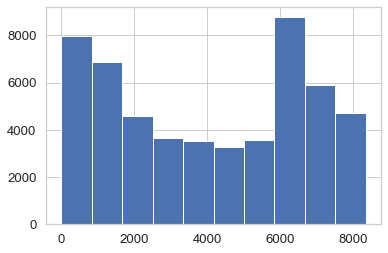

In [37]:
df.tenure.hist()

In [38]:
df.tenure.fillna(df.tenure.mean(),inplace=True)
#it could be better to fill null values with mean because of the distribution of column

### var_74 filling null values

In [39]:
df[df.var_74.isna()]

trf gndr  tenure var_5        dev_man device_os_name var_8  \
1101     0    F  3857.0  1004         Xiaomi     Android OS     1   
12536    9    M  1044.0   120  Hmd Global Oy    Proprietary     1   

      is_featurephone is_smartphone simcard_type  var_13  var_14  var_15  \
1101                0             1           3G     0.0     0.0     0.0   
12536               1             0           4G     0.0     0.0     0.0   

       var_16  var_17  var_18  var_19  var_20  var_21  var_22  var_23  var_24  \
1101      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12536     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       var_25  var_26  var_27  var_28  var_29  var_30  var_31  var_32  var_33  \
1101      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12536     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       var_34  var_35  var_36  var_37  var_38  var_39  var_40  var_41  var_42  \
1101      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12536     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       var_43  var_44  var_45  var_46  var_47  var_48  var_49  var_50  var_51  \
1101      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12536     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       var_52  var_53  var_54  var_55  var_56  var_57  var_58  var_59  var_60  \
1101      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12536     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       var_61  var_62  var_63  var_64  var_65  var_66  var_67  var_68  var_69  \
1101     14.0    25.0    25.0    25.0     0.0     0.0     0.0     0.0     0.0   
12536     3.0     3.0     8.0    12.0     0.0     0.0     0.0     0.0     0.0   

       var_70  var_71  var_72  region  var_74  var_76  var_77  var_78  var_79  \
1101      0.0     0.0     0.0      48     NaN    20.5     1.0     2.0     2.0   
12536     0.0     0.0     0.0       0     NaN    21.1     3.0     3.0     6.0   

       var_80  var_81  var_82  var_83  var_84  var_97  var_100  var_101  \
1101      2.0     1.0     2.0     2.0     2.0     0.0        0        0   
12536     9.0     1.0     1.0     2.0     3.0     0.0        0        0   

       var_102  var_105  var_107  var_108  var_110  var_111  var_114  var_117  \
1101         0        0        0        0        0        0        0        0   
12536        0        0        0        0        0        0        0        0   

       var_118  var_119  var_120  var_122  var_123  var_124 var_126 var_128  \
1101         0        0        0      0.0      0.0     0.06       0       0   
12536        0        0        0      0.0      0.0     0.01       0       0   

      var_129 var_130 var_131 var_132  var_134  var_136  var_137  var_138  \
1101      179       0      30       0      0.0      0.0        0      0.0   
12536      89       0      30       0      0.0      0.0        0      0.0   

       var_139  var_140  var_143  var_144  var_145  var_147  var_148  var_149  \
1101         0      0.0        0      0.0       12      0.0      0.0      0.0   
12536        0      0.0        0      0.0        1      0.0      0.0      0.0   

       var_150  var_151  var_152  var_154  var_157  var_158  var_159  var_160  \
1101       0.0      0.0      0.0      0.0      0.0      0.0        0      0.0   
12536      0.0      0.0      0.0      0.0      0.0      0.0        0      0.0   

       var_161  var_162  var_163  var_164  var_165  var_166  var_167  var_169  \
1101         0      0.0        0      0.0        1      0.0       31      0.0   
12536        0      0.0        0      0.0        0      0.0        3      0.0   

       var_170  var_171  var_172  var_173  var_174  var_175  var_176  var_179  \
1101       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
12536      0.0      0.0     

<Axes: >

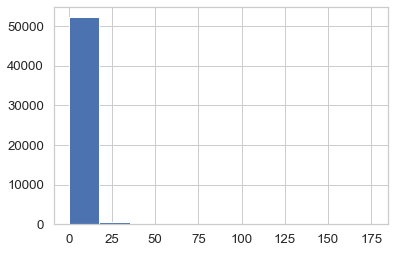

In [40]:
df.var_74.hist()

In [41]:
df.var_74.value_counts()

0.0     23799
0.1      7439
0.2      6223
0.3      3207
0.4      1962
        ...  
44.1        1
27.9        1
13.8        1
61.5        1
94.1        1
Name: var_74, Length: 353, dtype: int64

In [42]:
df.var_74.fillna(0.0,inplace=True)

### Device_os_name filling null values

In [43]:
df[df.device_os_name.isna()].head()

trf gndr  tenure var_5 dev_man device_os_name var_8 is_featurephone  \
203     0    M  1877.0     0  others           None     0               1   
2626   16    M  2576.0     0  others           None     0               1   
3854   16    F  2326.0     0  others           None     0               1   
5697    3    F   766.0     0  others           None     0               1   
8967    5    M  3871.0     0  others           None     0               1   

     is_smartphone simcard_type  var_13  var_14  var_15  var_16  var_17  \
203              0           4G     0.0     0.0   210.0   843.0     0.0   
2626             0           4G     0.0     0.0     0.0     0.0     0.0   
3854             0           4G     0.0    56.0   113.0   435.0     0.0   
5697             0           4G     0.0    30.0    86.0   284.0     0.0   
8967             0           4G     0.0    29.0    68.0   304.0     0.0   

      var_18  var_19  var_20  var_21  var_22  var_23  var_24  var_25  var_26  \
203      0.0   217.7  1060.6     0.0    0.00   17.50   35.13     0.0     0.0   
2626     0.0     0.0     0.0     0.0    0.00    0.00    0.00     0.0     0.0   
3854   112.1   211.3   833.4     0.0    7.00    9.42   18.13     0.0     2.0   
5697    30.8    72.7   219.5     0.0    3.75    7.17   11.83     0.0     1.0   
8967    22.2    76.3   426.4     0.0    3.63    5.67   12.67     0.0     0.8   

      var_27  var_28  var_29  var_30  var_31  var_32  var_33  var_34  var_35  \
203      1.0     1.3     0.0     0.0    35.0    67.0     0.0     0.0    34.7   
2626     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3854     1.9     1.9     0.0    14.0    32.0   134.0     0.0    58.8   105.2   
5697     0.8     0.8     0.0     0.0    10.0    24.0     0.0     0.0     6.1   
8967     1.1     1.4     0.0     7.0    20.0   149.0     0.0     6.0    24.5   

      var_36  var_37  var_38  var_39  var_40  var_41  var_42  var_43  var_44  \
203     70.2     0.0    0.00    2.92    2.79     0.0     0.0     1.0     1.0   
2626     0.0     0.0    0.00    0.00    0.00     0.0     0.0     0.0     0.0   
3854   306.4     0.0    1.75    2.67    5.58     0.0     4.2     3.3     2.3   
5697    16.2     0.0    0.00    0.83    1.00     0.0     0.0     0.6     0.7   
8967   204.9     0.0    0.88    1.67    6.21     0.0     0.9     1.2     1.4   

      var_45  var_46  var_47  var_48  var_49  var_50  var_51  var_52  var_53  \
203      0.0     0.0    18.0   149.0     0.0     0.0    12.3   142.0     0.0   
2626     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3854     0.0    25.0    42.0   156.0     0.0    39.5    55.4   179.7     0.0   
5697     0.0    10.0    22.0    55.0     0.0    14.6    31.8    54.8     0.0   
8967     0.0     4.0     6.0    20.0     0.0     2.0     2.4    12.0     0.0   

      var_54  var_55  var_56  var_57  var_58  var_59  var_60  var_61  var_62  \
203     0.00    1.50    6.21     0.0     0.0     0.7     1.0     0.0     1.0   
2626    0.00    0.00    0.00     0.0     0.0     0.0     0.0     0.0     0.0   
3854    3.13    3.50    6.50     0.0     1.6     1.3     1.2     0.0    22.0   
5697    1.25    1.83    2.29     0.0     1.5     1.4     1.0     0.0   172.0   
8967    0.50    0.50    0.83     0.0     0.5     0.4     0.6     0.0    66.0   

      var_63  var_64  var_65   var_66    var_67    var_68  var_69  var_70  \
203   1336.0  3843.0     0.0   464.78  23741.05  65993.82    7.82   44.26   
2626     0.0     0.0     0.0     0.00      0.00      0.00   16.40   18.40   
3854    27.0    93.0     0.0  1120.57   1765.14   6196.19    2.64   14.94   
5697   470.0  1150.0     0.0  1889.23   4234.65  14524.68    6.50   16.48   
8967   126.0   352.0     0.0  1666.46   3803.75  11862.66   18.09   24.97   

      var_71  var_72  region  var_74  var_76  var_77  var_78  var_79  var_80  \
203   100.88  223.81      52    44.1     6.6    5.00   30.25   97.25  196.25   
2626   30.15   43.77      52     1.3     5.6   16.00   20.00   2

In [44]:
df[df.device_os_name.isna()].shape

(29, 169)

In [45]:
df.device_os_name.value_counts()

Android OS           41479
Proprietary           8929
iOS                   2303
Symbian OS              48
Microsoft Windows       14
Bada OS                  8
KaiOS                    6
BlackBerry OS            5
Name: device_os_name, dtype: int64

In [46]:
df.device_os_name.fillna('Proprietary',inplace=True)

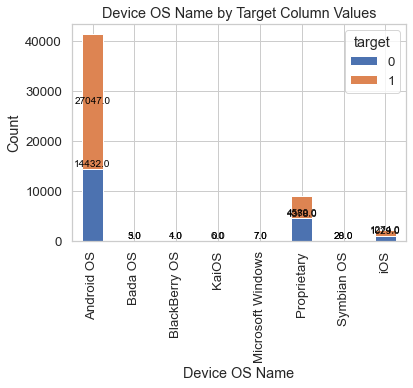

In [47]:
grouped = df.groupby(['device_os_name', 'target']).size().unstack().fillna(0)

# Plotting
ax = grouped.plot(kind='bar', stacked=True)
ax.set_xlabel("Device OS Name")
ax.set_ylabel("Count")
ax.set_title("Device OS Name by Target Column Values")

# Add count labels above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Proprietary software is not publicly available software that can be freely installed and used. It doesn't provide complete access to its source code.

### Simcard_type filling null values

In [48]:
df[df.simcard_type.isna()]

trf gndr  tenure var_5           dev_man device_os_name var_8  \
1       16    M  6180.0   565           Samsung     Android OS     1   
89       2    M  6149.0  1870            others    Proprietary     1   
96      10    M  7735.0   439     Hmd Global Oy    Proprietary     1   
106      2    M  6413.0  1676           Samsung     Android OS     1   
111      9    M  7836.0  2199             Nokia    Proprietary     1   
...    ...  ...     ...   ...               ...            ...   ...   
52765   10    M  6508.0  1191  Microsoft Mobile    Proprietary     1   
52780    0    M  8312.0  2222             Nokia    Proprietary     1   
52781    1    M  7432.0  1071     Hmd Global Oy    Proprietary     1   
52787    0    M  6278.0  1205            Huawei     Android OS     1   
52826    2    M  6595.0  1067           Samsung     Android OS     1   

      is_featurephone is_smartphone simcard_type  var_13  var_14  var_15  \
1                   0             1         None   484.0   998.0  1559.0   
89                  1             0         None    95.0   140.0   291.0   
96                  1             0         None   111.0   258.0   362.0   
106                 0             1         None    22.0    59.0    70.0   
111                 1             0         None    20.0    36.0    36.0   
...               ...           ...          ...     ...     ...     ...   
52765               1             0         None   140.0   205.0   284.0   
52780               1             0         None   489.0   926.0  1371.0   
52781               1             0         None    72.0   127.0   238.0   
52787               0             1         None    21.0    35.0    38.0   
52826               0             1         None   126.0   226.0   269.0   

       var_16  var_17  var_18  var_19  var_20  var_21  var_22  var_23  var_24  \
1      3072.0   668.9  1285.6  2139.7  4185.6  121.00  124.75  129.92  128.00   
89      461.0   152.8   262.4   572.4   837.1   23.75   17.50   24.25   19.21   
96      730.0   137.7   323.6   418.4   849.2   27.75   32.25   30.17   30.42   
106     207.0   225.8   413.0   434.4  1120.1    5.50    7.38    5.83    8.63   
111      57.0    36.2    72.2    72.2   121.2    5.00    4.50    3.00    2.38   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52765   591.0   169.2   256.0   337.6   686.2   35.00   25.63   23.67   24.63   
52780  2411.0   788.4  1222.6  1586.8  3380.8  122.25  115.75  114.25  100.46   
52781   629.0   119.6   218.4   405.1  1122.3   18.00   15.88   19.83   26.21   
52787    70.0    28.0    48.8    50.8    98.3    5.25    4.38    3.17    2.92   
52826   411.0   250.8   510.6   612.8   952.6   31.50   28.25   22.42   17.13   

       var_25  var_26  var_27  var_28  var_29  var_30  var_31  var_32  var_33  \
1         1.4     1.3     1.4     1.4   245.0   526.0   806.0  1643.0   302.5   
89        1.6     1.9     2.0     1.8    38.0    53.0   110.0   201.0    59.6   
96        1.2     1.3     1.2     1.2     9.0    14.0    14.0    16.0    11.4   
106      10.3     7.0     6.2     5.4    13.0    24.0    24.0    84.0   207.8   
111       1.8     2.0     2.0     2.1     8.0    17.0    17.0    32.0    14.2   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52765     1.2     1.2     1.2     1.2     0.0     0.0     0.0     0.0     0.0   
52780     1.6     1.3     1.2     1.4   293.0   556.0   838.0  1358.0   218.3   
52781     1.7     1.7     1.7     1.8     9.0    20.0    44.0    77.0     6.9   
52787     1.3     1.4     1.3     1.4    10.0    13.0    13.0    22.0    15.2   
52826     2.0     2.3     2.3     2.3    64.0   109.0   109.0   131.0   110.2   

       var_34  var_35  var_36  var_37  var_38  var_39  var_40  var_41  var_42  \
1       631.0  1017.0  2132.2   61.25   65.75   67.17   68.46     1.2     1.2   
89       96.2   190.3   288.8    9.50    6.63    9.17    8.38     1.6     1.8   
96       24.2    24.2    31.1    2.25   

In [49]:
df.simcard_type.fillna('other', inplace=True)
# to treat missing data as another category.

In [50]:
grouped = df.groupby(['simcard_type', 'target']).size().unstack().fillna(0)

# Reset index for Plotly Express
grouped = grouped.reset_index()

# Melt the DataFrame to have 'Target' values as a separate column
melted = pd.melt(grouped, id_vars=['simcard_type'], value_vars=[0,1], var_name='Target', value_name='Count')

# Create bar chart using Plotly Express
fig = px.bar(melted, x='simcard_type', y='Count', color='Target',
             barmode='stack', title="Sim Card Type by Target Column Values")
             
fig.update_layout(xaxis_title="Sim Card Type", yaxis_title="Count")

fig.show()

### Checking if null values left or not

In [51]:
df.isna().sum().sum()

0

## Converting data types to float

In [52]:
var_columns = [i for i in df.columns if 'var' in i]
for i in var_columns:
    df[i]=df[i].astype(float)

In [53]:
df['is_bundle_trf']=df['is_bundle_trf'].astype(int)

## Changing the place of columns

<h5>Columns with the label 'var' will be positioned on the right, while the remaining columns will be situated on the left.

In [54]:
not_var_columns=[i for i in df.columns if 'var' not in i]

In [55]:
comb_cols = not_var_columns + var_columns

In [56]:
df=df[comb_cols]

In [57]:
df

trf gndr  tenure  dev_man device_os_name is_featurephone is_smartphone  \
0        2    M  6384.0  Samsung     Android OS               0             1   
1       16    M  6180.0  Samsung     Android OS               0             1   
2        0    M  1534.0  Samsung     Android OS               0             1   
3        2    M  3925.0   Xiaomi     Android OS               0             1   
4        0    M   321.0  Samsung     Android OS               0             1   
...    ...  ...     ...      ...            ...             ...           ...   
52830    2    M  4939.0   Xiaomi     Android OS               0             1   
52831    2    M  6028.0  Samsung    Proprietary               1             0   
52832    3    U  1567.0   Xiaomi     Android OS               0             1   
52833    9    M  6524.0  Samsung     Android OS               0             1   
52834    9    M   658.0   Xiaomi     Android OS               0             1   

      simcard_type  region  target  is_bundle_trf age_bins   var_5  var_8  \
0               4G       1       0              0    55-65  1507.0    1.0   
1            other       0       0              1    20-35   565.0    1.0   
2               4G       1       1              0    20-35  1078.0    1.0   
3               3G      35       0              0    35-55  1219.0    1.0   
4               4G       7       1              0    35-55   145.0    1.0   
...            ...     ...     ...            ...      ...     ...    ...   
52830           4G      29       0              0    35-55   614.0    1.0   
52831           3G      25       0              0    55-65    99.0    1.0   
52832           4G      48       1              1    35-55   365.0    1.0   
52833           3G       0       1              0    35-55   338.0    1.0   
52834           4G       7       0              0    35-55   658.0    1.0   

       var_13  var_14  var_15  var_16  var_17  var_18  var_19  var_20  var_21  \
0       298.0   678.0  1080.0  2008.0   276.2   669.2   978.5  1892.6   74.50   
1       484.0   998.0  1559.0  3072.0   668.9  1285.6  2139.7  4185.6  121.00   
2         7.0    11.0    41.0   117.0     4.5    29.5   123.6   352.2    1.75   
3      1053.0  2176.0  2981.0  6257.0  1692.9  3636.4  5030.7  9425.8  263.25   
4        33.0    77.0   135.0   286.0    40.2    87.7   156.8   280.7    8.25   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52830   202.0   451.0   576.0  1520.0   126.8   477.8   601.2  1433.6   50.50   
52831    96.0   192.0   284.0   649.0   247.6   444.2   702.9  1756.0   24.00   
52832    60.0   104.0   154.0   389.0    97.8   170.0   269.7   718.3   15.00   
52833   245.0   472.0   530.0   878.0   318.5   596.0   683.3  1117.8   61.25   
52834     7.0    25.0    32.0    88.0     4.8    12.5    14.2    44.2    1.75   

       var_22  var_23  var_24  var_25  var_26  var_27  var_28  var_29  var_30  \
0       84.75   90.00   83.67     0.9     1.0     0.9     0.9   112.0   281.0   
1      124.75  129.92  128.00     1.4     1.3     1.4     1.4   245.0   526.0   
2        1.38    3.42    4.88     0.6     2.7     3.0     3.0     0.0     0.0   
3      272.00  248.42  260.71     1.6     1.7     1.7     1.5   622.0  1258.0   
4        9.63   11.25   11.92     1.2     1.1     1.2     1.0     4.0     5.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52830   56.38   48.00   63.33     0.6     1.1     1.0     0.9    17.0    51.0   
52831   24.00   23.67   27.04     2.6     2.3     2.5     2.7    16.0    44.0   
52832   13.00   12.83   16.21     1.6     1.6     1.8     1.8     3.0     5.0   
52833   59.00   44.17   36.58     1.3     1.3     1.3     1.3    55.0   112.0   
52834    3.13    2.67    3.67     0.7     0.5     0.4     0.5     2.0    12.0   

       var_31  var_32  var_33  var_34  var_35  var_36  var_37  var_38  var_39  \
0       485.0   912.0   127.0   299.3   455.8   913.0   28.00   35.13   40.42   
1

In [58]:
categoric_cols= list(df.select_dtypes(include=['object', 'category']).columns)
categoric_cols

['gndr',
 'dev_man',
 'device_os_name',
 'is_featurephone',
 'is_smartphone',
 'simcard_type',
 'age_bins']

In [59]:
numeric_cols = [col for col in df.columns if col not in categoric_cols]

## Percentage of numeric and categoric columns

Total features : 169
Categoric features : 7
Numeric features : 162


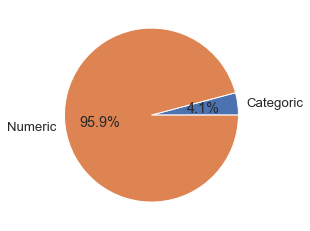

In [60]:
print('Total features :' , len(categoric_cols) +  len(numeric_cols))
print('Categoric features :' , len(categoric_cols))
print('Numeric features :' , len(numeric_cols))

plt.pie([len(categoric_cols), len(numeric_cols)], 
        labels=['Categoric', 'Numeric'],
        autopct='%1.1f%%')
plt.show()

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Analyzing columns seperately</p>


Text(0.5, 1.0, 'The relationship between device_os_name and region by target')

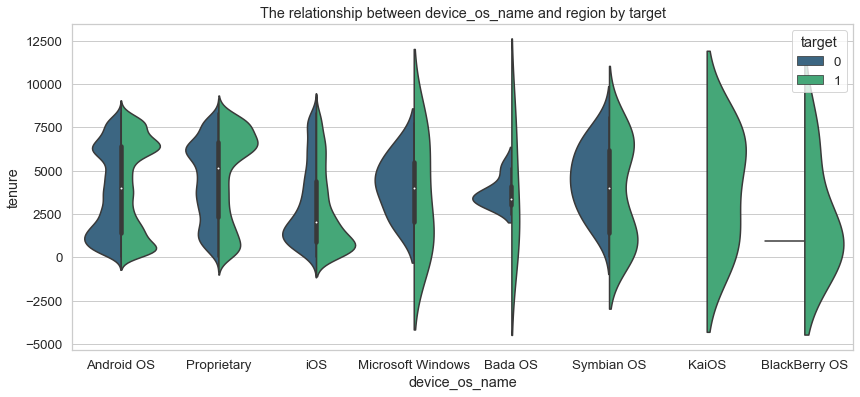

In [61]:
plt.figure(figsize=(14,6))
sns.violinplot(x='device_os_name', y='tenure',hue='target',data=df,palette='viridis',split=True)
plt.title('The relationship between device_os_name and region by target')

Text(0.5, 1.0, 'The relationship between simcard_type and tenure by target')

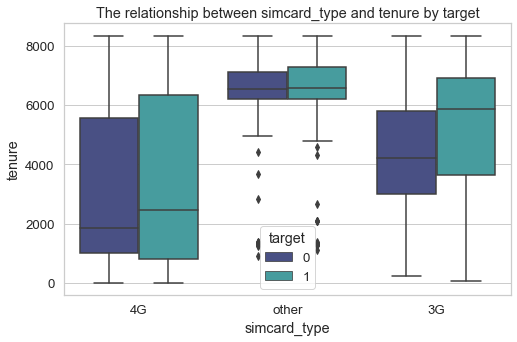

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x='simcard_type',y='tenure',
            data=df, hue='target', palette = 'mako')

plt.title('The relationship between simcard_type and tenure by target')

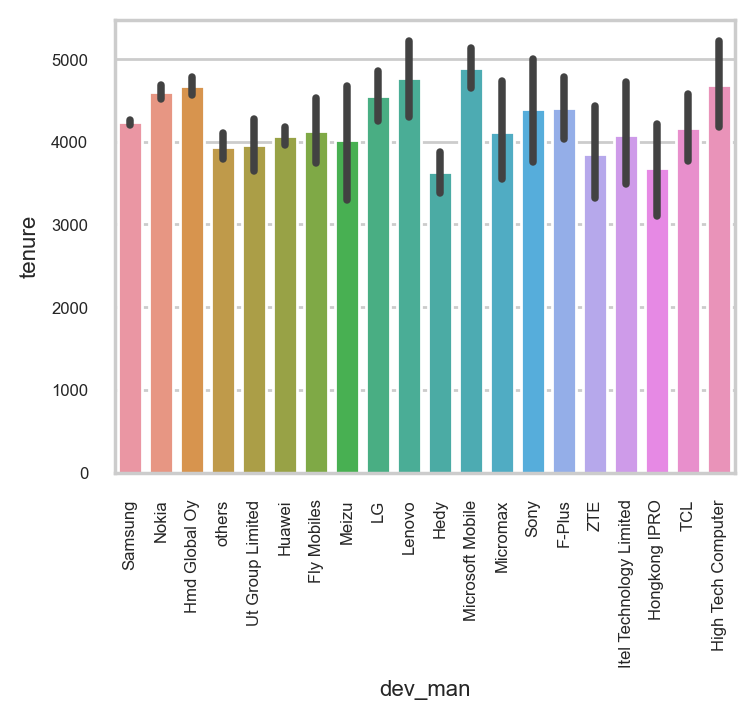

In [63]:
top_n = 20
top_dev_man = df.groupby('dev_man')['tenure'].mean().nlargest(top_n).index

#Filtering data with selected 'dev_man' values
filtered_df = df[df['dev_man'].isin(top_dev_man)]

#Creating the bar chart
plt.figure(figsize=(4,3), dpi=200)
sns.barplot(x='dev_man', y='tenure', data=filtered_df, estimator=np.mean)

#Customizing x-axis labels
plt.xticks(rotation=90,fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('dev_man',fontsize=8)  # Adjust fontsize as needed
plt.ylabel('tenure',fontsize=8)
plt.show()


In [64]:
for i in df[categoric_cols]:
    top = df[i].value_counts().head()
    # Create a bar chart using Plotly Express
    fig = px.bar(
        x=top.index,
        y=top.values,
        labels={'x': i, 'y': 'Count'},
        title=f'Values in the {i} Column'
    )
    fig.update_layout(
    autosize=False,
    width=750,   # Set the width in pixels
    height=500   # Set the height in pixels
    )

    fig.show()

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Correlation</p>


<h3>Correlation between features

In [65]:
corr_matrix = df[numeric_cols].corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
for index, values in sol.items():
    if values >0.97:
        print(index, f'{values:.2f}')

('var_13', 'var_21') 1.00
('var_29', 'var_37') 1.00
('var_45', 'var_53') 1.00
('var_14', 'var_22') 1.00
('var_15', 'var_23') 1.00
('var_16', 'var_24') 1.00
('var_30', 'var_38') 1.00
('var_31', 'var_39') 1.00
('var_32', 'var_40') 1.00
('var_46', 'var_54') 1.00
('var_47', 'var_55') 1.00
('var_48', 'var_56') 1.00
('var_122', 'var_208') 1.00
('var_38', 'var_39') 0.99
('var_31', 'var_38') 0.99
('var_30', 'var_39') 0.99
('var_30', 'var_31') 0.99
('var_14', 'var_15') 0.99
('var_14', 'var_23') 0.99
('var_15', 'var_22') 0.99
('var_22', 'var_23') 0.99
('var_132', 'var_137') 0.99
('var_18', 'var_19') 0.99
('var_34', 'var_35') 0.99
('var_47', 'var_54') 0.99
('var_46', 'var_47') 0.99
('var_54', 'var_55') 0.99
('var_46', 'var_55') 0.99
('var_50', 'var_51') 0.98
('var_29', 'var_30') 0.98
('var_30', 'var_37') 0.98
('var_29', 'var_38') 0.98
('var_37', 'var_38') 0.98
('var_13', 'var_14') 0.98
('var_14', 'var_21') 0.98
('var_21', 'var_22') 0.98
('var_13', 'var_22') 0.98
('var_33', 'var_97') 0.98
('var_31

In [66]:
columns_to_drop_due_to_correlation = []
for index, values in sol.items():
    if values > 0.97:
        columns_to_drop_due_to_correlation.append(index[0])

len(list(set(columns_to_drop_due_to_correlation)))
df.drop(columns=columns_to_drop_due_to_correlation,axis=1, inplace=True)

In [67]:
#0.97

In [68]:
df.shape

(52821, 133)

## Correlations with target column

In [69]:
categoric_cols= list(df.select_dtypes(include=['object', 'category']).columns)
categoric_cols

['gndr',
 'dev_man',
 'device_os_name',
 'is_featurephone',
 'is_smartphone',
 'simcard_type',
 'age_bins']

In [70]:
numeric_cols = [col for col in df.columns if col not in categoric_cols]

In [71]:
df[numeric_cols].corr()['target'].sort_values(ascending=False)

target           1.000000
is_bundle_trf    0.095234
trf              0.073471
var_76           0.071784
var_129          0.068479
                   ...   
var_84          -0.084860
var_20          -0.091229
var_143         -0.091431
var_165         -0.093320
var_187         -0.096865
Name: target, Length: 126, dtype: float64

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Checking outliers</p>


In [72]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

for c in df[numeric_cols].columns:
    outliers = find_outliers_IQR(df[c])
    if str(len(outliers)) != "0":
        print(c)
        print('outliers sayi: '+ str(len(outliers)))
        print('En boyuk outlier deyeri: '+ str(outliers.max()))
        print('En kicik outlier deyeri: ' + str(outliers.min()))
        print("*" * 30)

trf
outliers sayi: 2805
En boyuk outlier deyeri: 21
En kicik outlier deyeri: 17
******************************
region
outliers sayi: 175
En boyuk outlier deyeri: 58
En kicik outlier deyeri: 58
******************************
is_bundle_trf
outliers sayi: 10853
En boyuk outlier deyeri: 1
En kicik outlier deyeri: 1
******************************
var_5
outliers sayi: 2561
En boyuk outlier deyeri: 2222.0
En kicik outlier deyeri: 1960.0
******************************
var_8
outliers sayi: 5512
En boyuk outlier deyeri: 23.0
En kicik outlier deyeri: 0.0
******************************
var_20
outliers sayi: 5025
En boyuk outlier deyeri: 87405.7
En kicik outlier deyeri: 5331.9
******************************
var_24
outliers sayi: 4744
En boyuk outlier deyeri: 1914.04
En kicik outlier deyeri: 146.71
******************************
var_25
outliers sayi: 4513
En boyuk outlier deyeri: 48.2
En kicik outlier deyeri: 3.4
******************************
var_26
outliers sayi: 3843
En boyuk outlier deyeri: 48.2

var_149
outliers sayi: 6421
En boyuk outlier deyeri: 63.12000000000001
En kicik outlier deyeri: 1.01
******************************
var_150
outliers sayi: 6245
En boyuk outlier deyeri: 62.16000000000001
En kicik outlier deyeri: 1.3599999999999999
******************************
var_151
outliers sayi: 11472
En boyuk outlier deyeri: 13155.09317398071
En kicik outlier deyeri: 0.06314373016357422
******************************
var_152
outliers sayi: 6581
En boyuk outlier deyeri: 25.0
En kicik outlier deyeri: -1.415610308141968e-08
******************************
var_154
outliers sayi: 12201
En boyuk outlier deyeri: 54534.64441204071
En kicik outlier deyeri: 3.814697265625e-05
******************************
var_157
outliers sayi: 10919
En boyuk outlier deyeri: 120.0
En kicik outlier deyeri: 1.16
******************************
var_158
outliers sayi: 8849
En boyuk outlier deyeri: 351.0
En kicik outlier deyeri: 8.0
******************************
var_159
outliers sayi: 8604
En boyuk outlier deyer

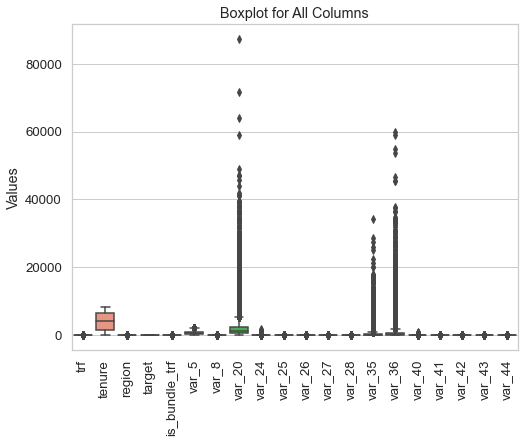

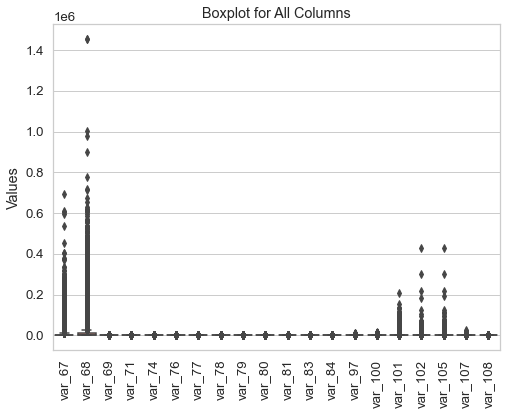

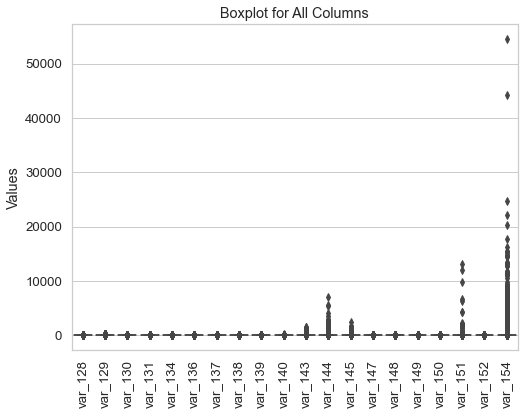

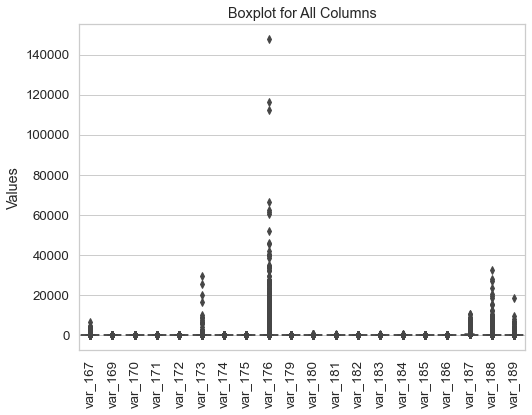

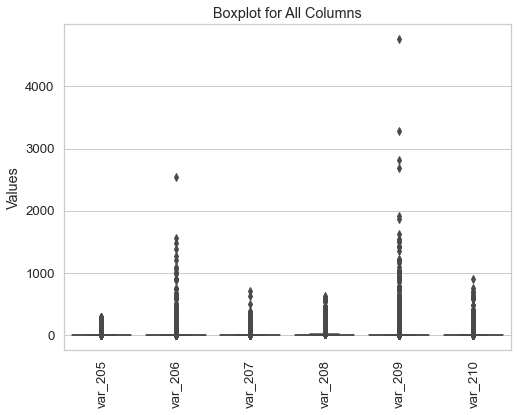

In [73]:
for i in range(0,150,30):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[numeric_cols].iloc[:,i:i+20])
    plt.xticks(rotation=90)
    plt.title("Boxplot for All Columns")
    plt.ylabel("Values")
    plt.show()

<h3>I will set the threshold for each of them based on seperate analysis of columns

In [74]:
df.var_20.max()

87405.7

In [75]:
df.var_20.min()

0.0

In [76]:
df['var_20'] = df['var_20'].apply(lambda x: 50000 if x > 50000 else x)

In [77]:
df['var_35'] = df['var_35'].apply(lambda x: 30000 if x > 30000 else x)

In [78]:
df['var_36'] = df['var_36'].apply(lambda x: 39000 if x > 39000 else x)

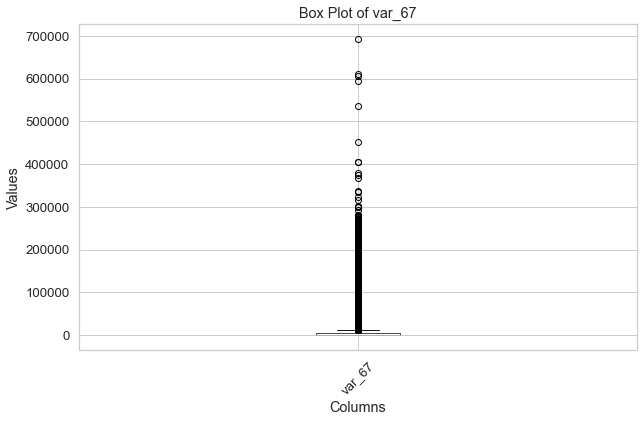

In [79]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_67'])
plt.title('Box Plot of var_67')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [80]:
df.var_67.max()

693081.49

In [81]:
df['var_67'] = df['var_67'].apply(lambda x: 300000 if x > 300000 else x)

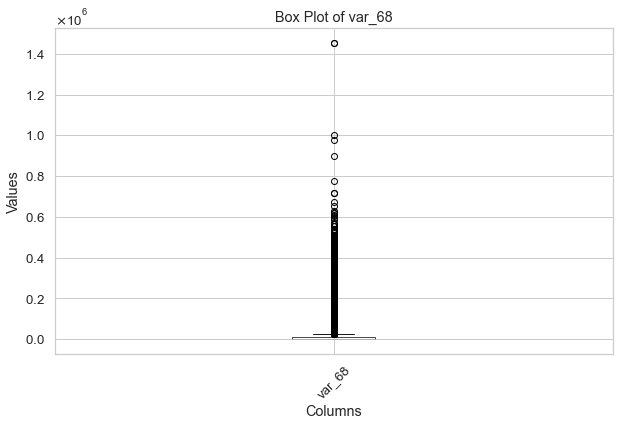

In [82]:
plt.figure(figsize=(10, 6))  # Set the figure size
ax = df.boxplot(column=['var_68'])
plt.title('Box Plot of var_68')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label

# Format y-axis tick labels to display non-scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [83]:
df.var_68.max()

1453900.49

In [84]:
df['var_68'] = df['var_68'].apply(lambda x: 0.65*1000000 if x > 0.65*1000000 else x)

In [85]:
df.var_101.max()

206389.0

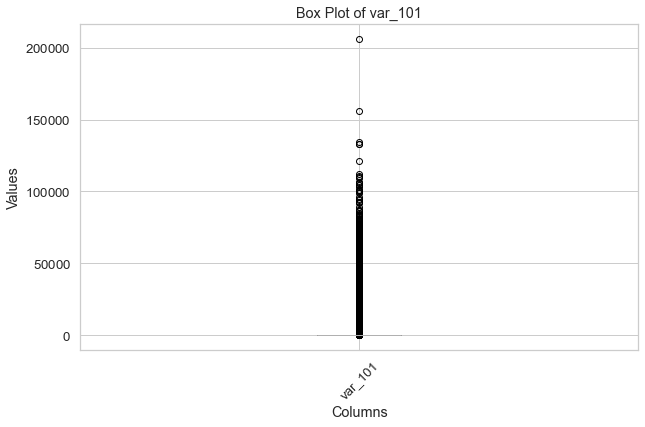

In [86]:
plt.figure(figsize=(10, 6))  # Set the figure size
ax = df.boxplot(column=['var_101'])
plt.title('Box Plot of var_101')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label

# Format y-axis tick labels to display non-scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [87]:
df['var_101'] = df['var_101'].apply(lambda x: 110000 if x > 110000 else x)

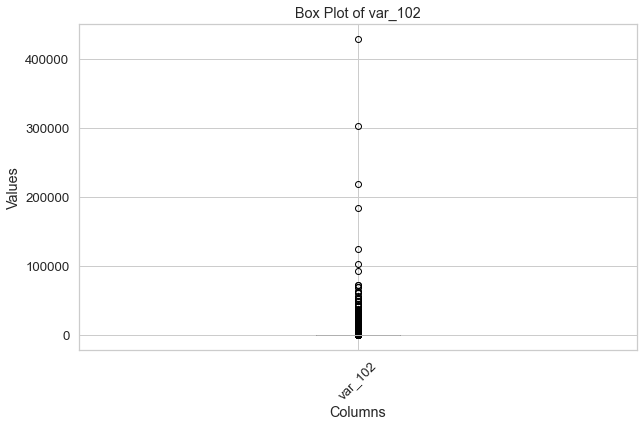

In [88]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_102'])
plt.title('Box Plot of var_102')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [89]:
df['var_102'] = df['var_102'].apply(lambda x: 80000 if x > 80000 else x)

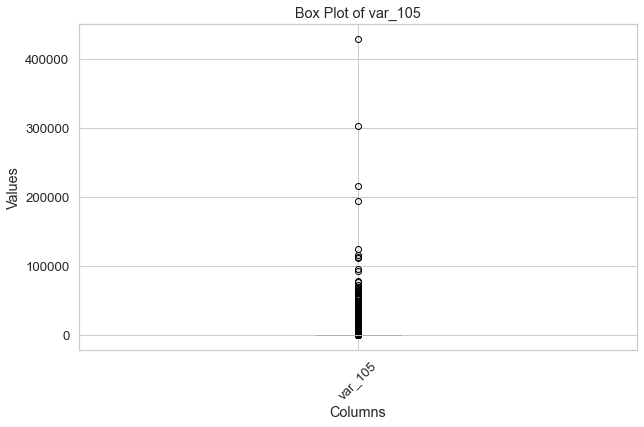

In [90]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_105'])
plt.title('Box Plot of var_105')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [91]:
df['var_105'] = df['var_105'].apply(lambda x: 80000 if x > 80000 else x)

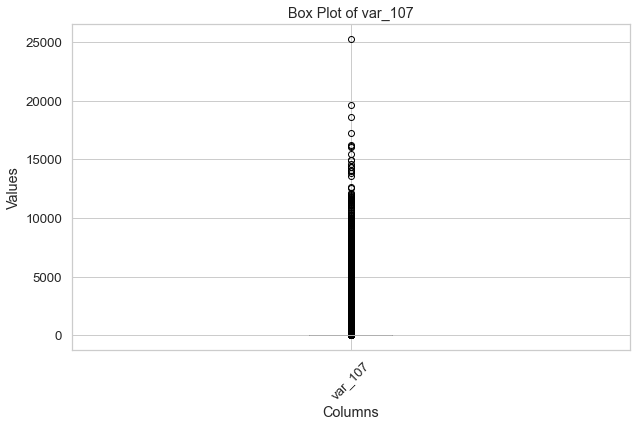

In [92]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_107'])
plt.title('Box Plot of var_107')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [93]:
df['var_107'] = df['var_107'].apply(lambda x: 12500 if x > 12500 else x)

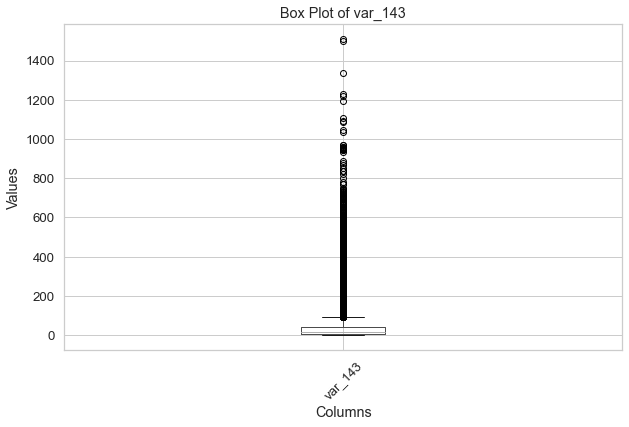

In [94]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_143'])
plt.title('Box Plot of var_143')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [95]:
df['var_143'] = df['var_143'].apply(lambda x: 900 if x > 900 else x)

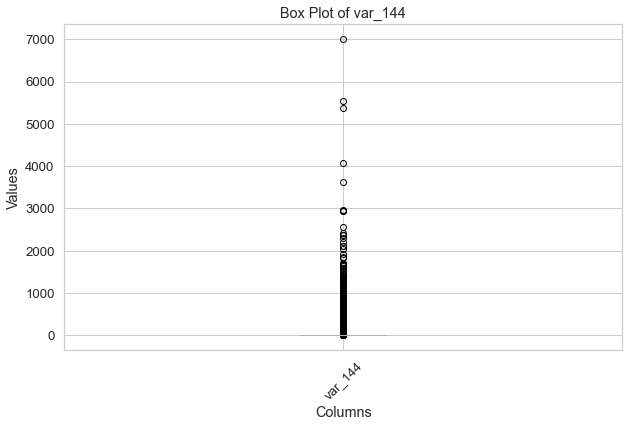

In [96]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_144'])
plt.title('Box Plot of var_144')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [97]:
df['var_144'] = df['var_144'].apply(lambda x: 2000 if x > 2000 else x)

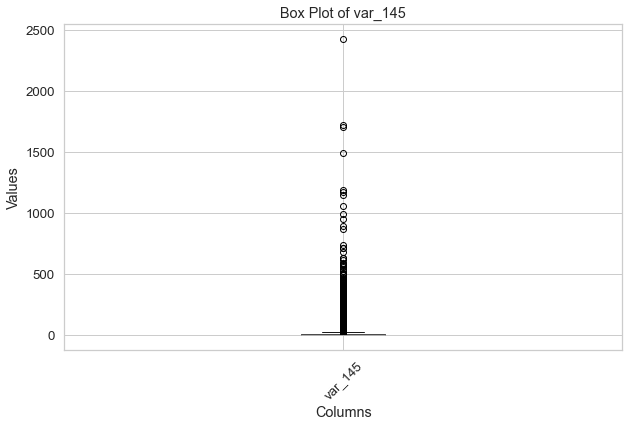

In [98]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_145'])
plt.title('Box Plot of var_145')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [99]:
df['var_145'] = df['var_145'].apply(lambda x: 600 if x > 600 else x)

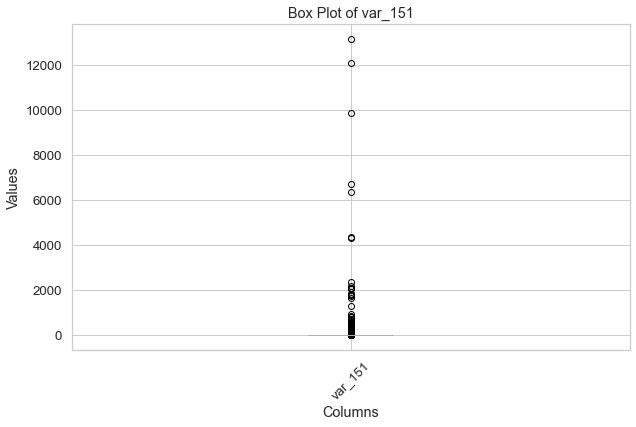

In [100]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_151'])
plt.title('Box Plot of var_151')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [101]:
df['var_151'] = df['var_151'].apply(lambda x: 1000 if x > 1000 else x)

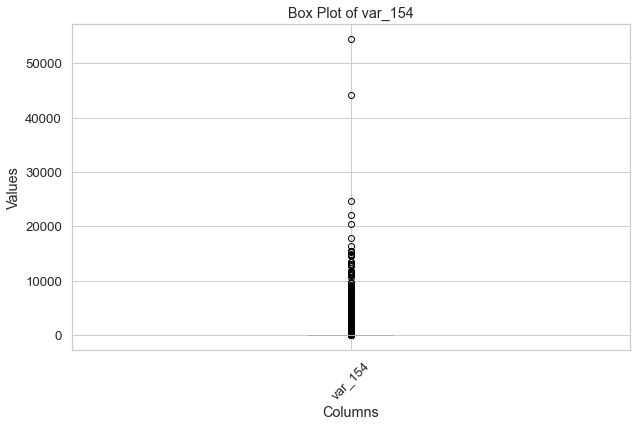

In [102]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_154'])
plt.title('Box Plot of var_154')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [103]:
df['var_154'] = df['var_154'].apply(lambda x: 15000 if x > 15000 else x)

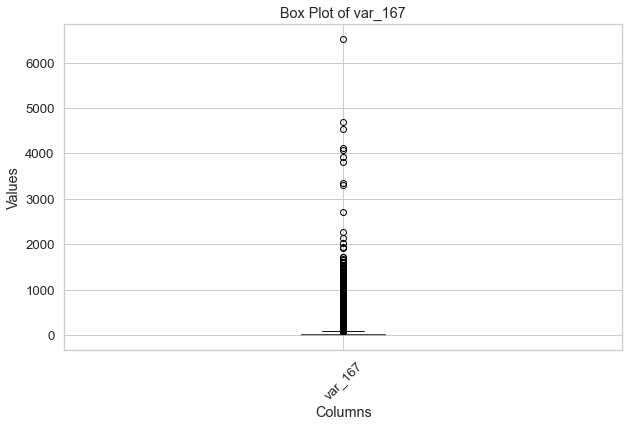

In [104]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_167'])
plt.title('Box Plot of var_167')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [105]:
df['var_167'] = df['var_167'].apply(lambda x: 1600 if x > 1600 else x)

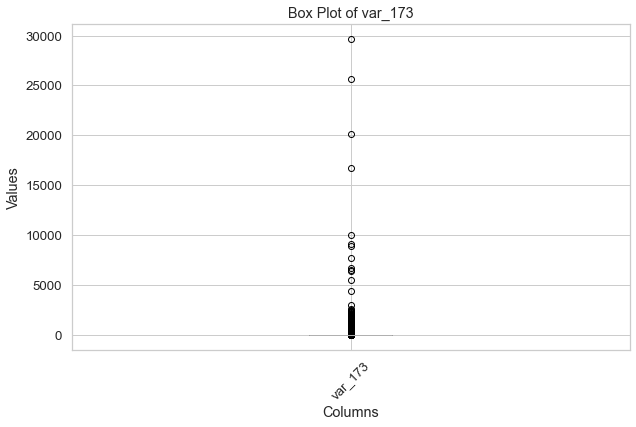

In [106]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_173'])
plt.title('Box Plot of var_173')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [107]:
df['var_173'] = df['var_173'].apply(lambda x: 2500 if x > 2500 else x)

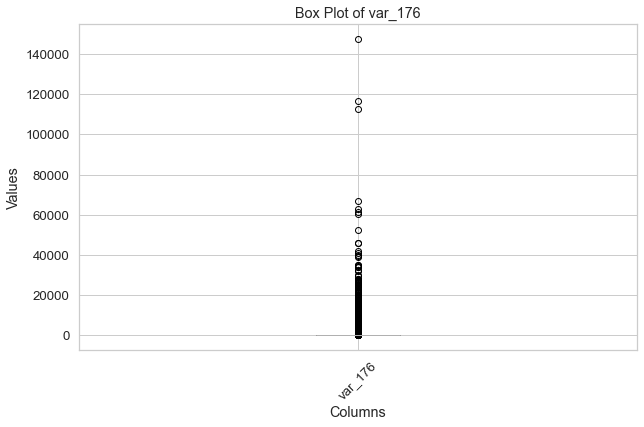

In [108]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_176'])
plt.title('Box Plot of var_176')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [109]:
df['var_176'] = df['var_176'].apply(lambda x: 35000 if x > 35000 else x)

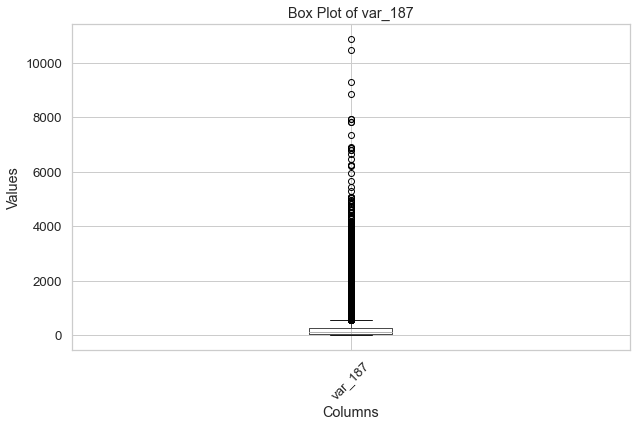

In [110]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_187'])
plt.title('Box Plot of var_187')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [111]:
df['var_187'] = df['var_187'].apply(lambda x: 5000 if x > 5000 else x)

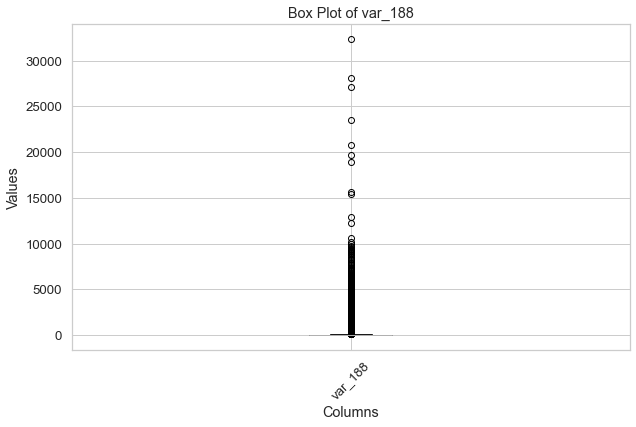

In [112]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_188'])
plt.title('Box Plot of var_188')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [113]:
df['var_188'] = df['var_188'].apply(lambda x: 10000 if x > 10000 else x)

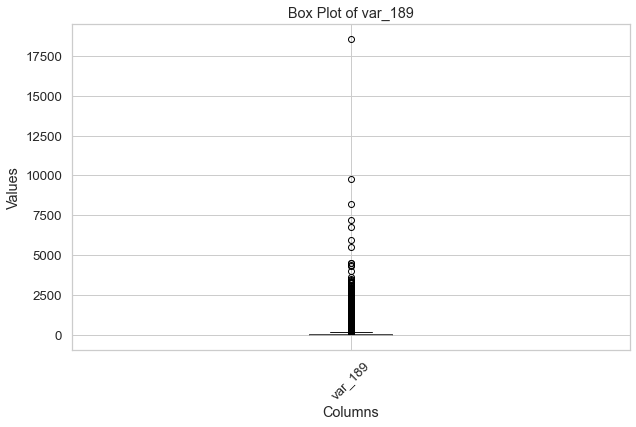

In [114]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_189'])
plt.title('Box Plot of var_189')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [115]:
df['var_189'] = df['var_189'].apply(lambda x: 3500 if x > 3500 else x)

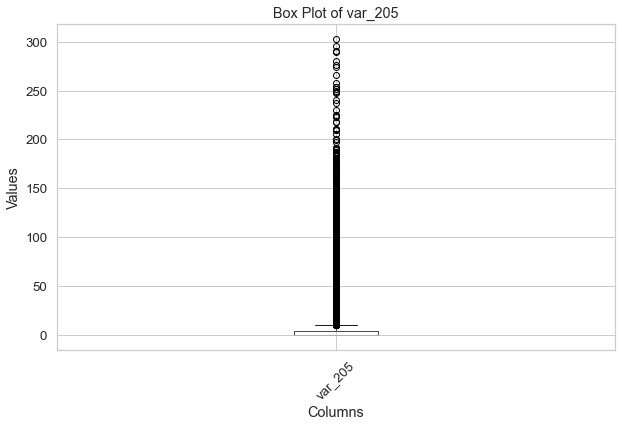

In [116]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_205'])
plt.title('Box Plot of var_205')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [117]:
df['var_205'] = df['var_205'].apply(lambda x: 200 if x > 200 else x)

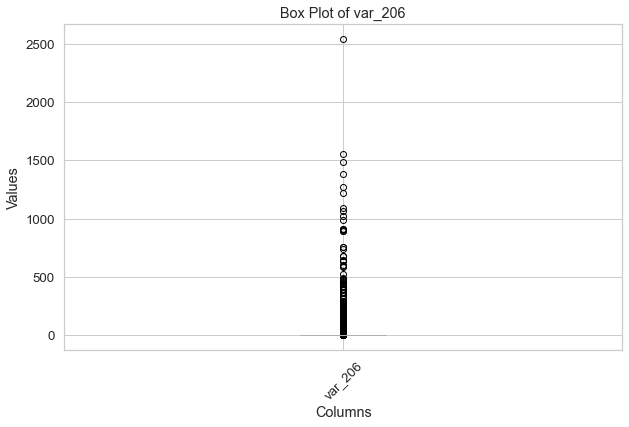

In [118]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_206'])
plt.title('Box Plot of var_206')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [119]:
df['var_206'] = df['var_206'].apply(lambda x: 500 if x > 500 else x)

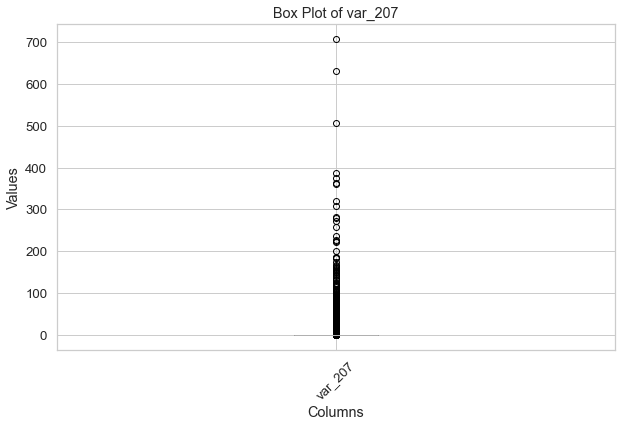

In [120]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_207'])
plt.title('Box Plot of var_207')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [121]:
df['var_207'] = df['var_207'].apply(lambda x: 200 if x > 200 else x)

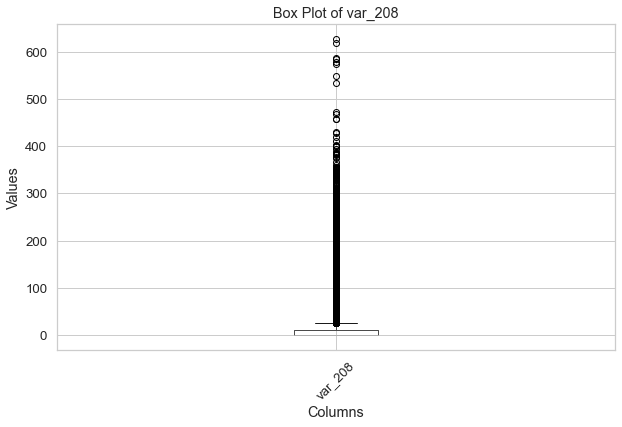

In [122]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_208'])
plt.title('Box Plot of var_208')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [123]:
df['var_208'] = df['var_208'].apply(lambda x: 400 if x > 400 else x)

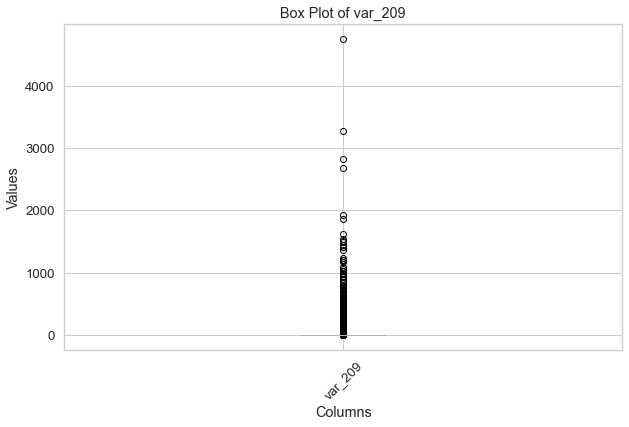

In [124]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_209'])
plt.title('Box Plot of var_209')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [125]:
df['var_209'] = df['var_209'].apply(lambda x: 1100 if x > 1100 else x)

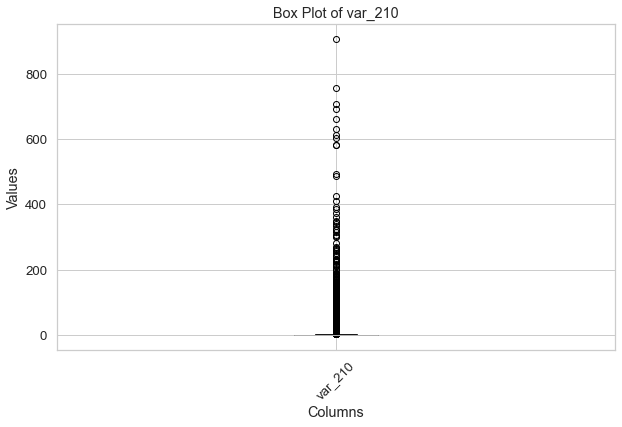

In [126]:
plt.figure(figsize=(10, 6))  # Set the figure size
df.boxplot(column=['var_210'])
plt.title('Box Plot of var_210')  # Set the plot title
plt.ylabel('Values')  # Set the y-axis label
plt.xlabel('Columns')  # Set the x-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [127]:
df['var_210'] = df['var_210'].apply(lambda x: 250 if x > 250 else x)

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Feature engineering</p>


In [128]:
df.head()

trf gndr  tenure  dev_man device_os_name is_featurephone is_smartphone  \
0    2    M  6384.0  Samsung     Android OS               0             1   
1   16    M  6180.0  Samsung     Android OS               0             1   
2    0    M  1534.0  Samsung     Android OS               0             1   
3    2    M  3925.0   Xiaomi     Android OS               0             1   
4    0    M   321.0  Samsung     Android OS               0             1   

  simcard_type  region  target  is_bundle_trf age_bins   var_5  var_8  var_20  \
0           4G       1       0              0    55-65  1507.0    1.0  1892.6   
1        other       0       0              1    20-35   565.0    1.0  4185.6   
2           4G       1       1              0    20-35  1078.0    1.0   352.2   
3           3G      35       0              0    35-55  1219.0    1.0  9425.8   
4           4G       7       1              0    35-55   145.0    1.0   280.7   

   var_24  var_25  var_26  var_27  var_28  var_35  var_36  var_40  var_41  \
0   83.67     0.9     1.0     0.9     0.9   455.8   913.0   38.00     1.1   
1  128.00     1.4     1.3     1.4     1.4  1017.0  2132.2   68.46     1.2   
2    4.88     0.6     2.7     3.0     3.0     1.0     7.4    0.33     0.0   
3  260.71     1.6     1.7     1.7     1.5  2808.2  5485.2  151.83     1.6   
4   11.92     1.2     1.1     1.2     1.0    19.4    41.1    2.04     0.9   

   var_42  var_43  var_44  var_49  var_52  var_56  var_57  var_58  var_59  \
0     1.1     0.9     1.0     4.5    22.2    1.00     1.1     0.9     0.8   
1     1.2     1.3     1.3    21.5   193.5    6.50     1.1     1.1     1.3   
2     0.0     0.5     0.9     0.5     6.2    0.38     0.5     0.5     0.7   
3     1.7     1.7     1.5    40.8   178.1    7.33     1.1     1.2     1.1   
4     0.8     1.1     0.8    29.5   151.5    5.71     1.7     1.4     1.4   

   var_60  var_63  var_64   var_65   var_67   var_68  var_69  var_71  var_74  \
0     0.9   152.0   272.0   396.36   831.14  1014.69   11.33   35.68     0.0   
1     1.2   116.0   242.0    53.85  4182.41  9356.48   10.01   51.98     0.0   
2     0.7   133.0   242.0  1913.52  2849.79  3227.02    5.17   10.73     2.6   
3     1.0   455.0   958.0     0.00     0.00     0.00   15.52   43.17     0.2   
4     1.1   101.0   220.0     0.00     0.00     0.00    2.63    8.43     0.0   

   var_76  var_77  var_78  var_79  var_80  var_81  var_83  var_84  var_97  \
0     5.2    12.0    27.0    36.0    57.0     4.0    12.0    19.0   131.5   
1    12.2    10.0    20.0    50.0    95.0     1.0     4.0     9.0   324.0   
2    32.5     0.0     4.0     8.0    12.0     0.0     4.0     7.0     0.6   
3     4.6     9.0    28.0    41.0    91.0     3.0    11.0    26.0  1047.6   
4     4.5     2.0     5.0     9.0    21.0     2.0     9.0    17.0    33.2   

   var_100  var_101  var_102  var_105  var_107  var_108  var_110  var_111  \
0      0.0    396.0      3.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0     53.0      0.0      0.0      0.0      0.0     42.0   
2      0.0      0.0    209.0   1913.0     39.0      2.0     92.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   var_114  var_117  var_118  var_119  var_120  var_123  var_124  var_126  \
0     89.0      0.0     18.0     58.0     42.0     7.62     0.14      0.0   
1      0.0      0.0      0.0      0.0      0.0     0.75     0.05      0.0   
2     42.0      1.0      0.0     43.0   1380.0     0.06     0.08      0.0   
3      0.0      0.0      0.0      0.0      0.0     1.21     2.03      2.0   
4      0.0      0.0      0.0      0.0      0.0     0.42     2.07      0.0   

   var_128  var_129  var_130  var_131  var_134  var_136  var_137  var_138  \
0      0.0      0.0      0.0      0.0      3.0      0.0      0.0     0.00   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.00   
2      0.0    130.0      1

In [129]:
df.shape

(52821, 133)

<h3>The number of unique elements in each categoric columns

In [130]:
for i in df[categoric_cols]:
    print(f'The number of unique elements in {i}: {df[i].nunique()}')

The number of unique elements in gndr: 3
The number of unique elements in dev_man: 26
The number of unique elements in device_os_name: 8
The number of unique elements in is_featurephone: 2
The number of unique elements in is_smartphone: 2
The number of unique elements in simcard_type: 3
The number of unique elements in age_bins: 6


## WOE, IV using OptBinning

<h3>Why OptBinning?</h3>

Optimal Binning, also known as optimal binning or binning optimization, is a technique used in data preprocessing to transform continuous or ordinal variables into discrete bins. The main goal of optimal binning is to find the best way to group or partition the data into bins, such that the resulting binned variable enhances the performance of predictive models or provides better insights during analysis. 

In [131]:
def calculate_woe_iv_numeric(df, feature, target):
    data = df[[feature, target]].copy()
    binning_process = OptimalBinning(name=feature, dtype="numerical", solver="cp")
    '''
    name=feature: Here, feature is the name of the numerical variable (column) for which we want to perform optimal binning. 
    The name parameter assigns a name to the variable for reference within the OptimalBinning process.

    dtype="numerical": This parameter specifies the data type of the feature you're binning. In this case, 
    it's set to "numerical," indicating that you're working with a numerical (continuous or ordinal) feature.

    solver="cp": The solver parameter specifies the optimization solver to be used for finding the optimal bins. 
    In this case, "cp" refers to a convex programming solver, which is a common optimization technique.
    
    '''
    binning_process.fit(data[feature], data[target])
    data[feature] = binning_process.transform(data[feature])
    data['good'] = data[target] == 0
    data['bad'] = data[target] == 1
    grouped = data.groupby(feature).agg({'good': 'sum', 'bad': 'sum', target: 'count'})
    grouped['total_good'] = grouped['good'].sum()
    grouped['total_bad'] = grouped['bad'].sum()
    grouped['woe'] = np.log((grouped['good'] / grouped['total_good']) / (grouped['bad'] / grouped['total_bad']))
    grouped['iv'] = grouped['woe'] * (grouped['good'] / grouped['total_good'] - grouped['bad'] / grouped['total_bad'])
    return grouped

def calculate_woe_iv_categorical(df, feature, target):
    data = df[[feature, target]].copy()
    binning_process = OptimalBinning(name=feature, dtype="categorical", solver="cp")
    '''
    dtype: This parameter defines the type of data you're binning. In this case, you're indicating that the data type is 
    "categorical." This means that you intend to perform optimal binning on categorical variables, which is usually the 
    case when calculating WoE and IV for categorical features.

    solver: This parameter specifies the solver or optimization algorithm to use when performing the binning process.
    "cp" stands for "cart-py," which refers to the Cartopy library, an optional dependency for optimal_binning. 
    This solver is based on the Cartopy library's optimization routines. There are other solvers available as well, 
    such as "mip" (Mixed Integer Programming) and "glpk" (GNU Linear Programming Kit).
    '''
    binning_process.fit(data[feature], data[target])
    data[feature] = binning_process.transform(data[feature])
    data['good'] = data[target] == 0
    data['bad'] = data[target] == 1
    grouped = data.groupby(feature).agg({'good': 'sum', 'bad': 'sum', target: 'count'})
    grouped['total_good'] = grouped['good'].sum()
    grouped['total_bad'] = grouped['bad'].sum()
    grouped['woe'] = np.log((grouped['good'] / grouped['total_good']) / (grouped['bad'] / grouped['total_bad']))
    grouped['iv'] = grouped['woe'] * (grouped['good'] / grouped['total_good'] - grouped['bad'] / grouped['total_bad'])
    return grouped

def feature_selection_with_top_iv(df, target, num_features=70):
    iv_scores = []
    for feature in df.columns:
        if feature != target:
            if pd.api.types.is_numeric_dtype(df[feature]):
                woe_iv = calculate_woe_iv_numeric(df, feature, target)
            else:
                woe_iv = calculate_woe_iv_categorical(df, feature, target)
            total_iv = woe_iv['iv'].sum()
            iv_scores.append((feature, total_iv))

    sorted_iv_scores = sorted(iv_scores, key=lambda x: x[1], reverse=True)
    selected_features = [feature for feature, _ in sorted_iv_scores[:num_features]]
    return selected_features

target_variable = 'target'
selected_features = feature_selection_with_top_iv(df, target_variable, num_features=70)
print("Selected features:", selected_features)

Selected features: ['tenure', 'trf', 'var_188', 'var_166', 'var_187', 'var_183', 'var_165', 'dev_man', 'var_144', 'var_143', 'var_182', 'var_184', 'region', 'var_161', 'var_198', 'var_160', 'device_os_name', 'var_148', 'var_40', 'var_97', 'is_featurephone', 'is_smartphone', 'var_35', 'var_36', 'simcard_type', 'var_162', 'var_84', 'var_181', 'var_170', 'var_110', 'var_176', 'var_180', 'var_20', 'var_192', 'var_159', 'var_158', 'var_83', 'var_137', 'var_136', 'var_81', 'var_68', 'var_41', 'var_123', 'var_67', 'var_69', 'var_138', 'is_bundle_trf', 'var_139', 'var_24', 'var_107', 'var_154', 'var_100', 'var_126', 'gndr', 'var_74', 'var_195', 'var_76', 'var_108', 'var_42', 'var_147', 'var_65', 'var_128', 'var_140', 'var_49', 'var_5', 'var_173', 'var_71', 'var_77', 'var_78', 'var_28']


In [132]:
selected_features.append('target')

In [133]:
df=df[selected_features]

## Label Encoding

In [134]:
df.head()

tenure  trf  var_188  var_166  var_187  var_183  var_165  dev_man  var_144  \
0  6384.0    2     41.4      4.8    383.0      4.0    190.0  Samsung      0.0   
1  6180.0   16     15.3      8.7    126.0     14.0     54.0  Samsung      0.0   
2  1534.0    0     42.5     15.8    103.0      0.0     40.0  Samsung      2.0   
3  3925.0    2    225.4    168.6    556.0     20.0    256.0   Xiaomi     77.3   
4   321.0    0      2.2      0.0     29.0      0.0     11.0  Samsung      0.0   

   var_143  var_182  var_184  region  var_161   var_198  var_160  \
0     64.0     2.20      0.0       1      1.0  0.220027     0.55   
1      8.0    10.23     11.0       0      9.0  0.000000     8.80   
2      9.0     0.00      0.0       1      0.0  1.112254     0.00   
3     71.0     5.94      4.0      35      9.0  0.000000     2.64   
4      2.0     0.00      0.0       7      0.0  0.000000     0.00   

  device_os_name  var_148  var_40  var_97 is_featurephone is_smartphone  \
0     Android OS     6.88   38.00   131.5               0             1   
1     Android OS     0.00   68.46   324.0               0             1   
2     Android OS     0.00    0.33     0.6               0             1   
3     Android OS     1.03  151.83  1047.6               0             1   
4     Android OS     0.28    2.04    33.2               0             1   

   var_35  var_36 simcard_type  var_162  var_84  var_181  var_170  var_110  \
0   455.8   913.0           4G      0.0    19.0      0.0    24.39      0.0   
1  1017.0  2132.2        other     10.0     9.0      0.0     0.78      0.0   
2     1.0     7.4           4G      0.0     7.0      5.0     0.08     92.0   
3  2808.2  5485.2           3G      4.0    26.0      3.0     5.04      0.0   
4    19.4    41.1           4G      0.0    17.0      0.0     1.24      0.0   

    var_176  var_180  var_20  var_192  var_159  var_158  var_83  var_137  \
0  0.220027      0.0  1892.6    44.16      0.0      0.0    12.0      0.0   
1  0.000000      0.0  4185.6     3.84      0.0      0.0     4.0      0.0   
2  1.112254      8.0   352.2     0.48      4.0      6.0     4.0      3.0   
3  0.000000      3.0  9425.8     8.65      1.0      1.0    11.0      0.0   
4  0.000000      0.0   280.7     2.44      0.0      0.0     9.0      0.0   

   var_136  var_81   var_68  var_41  var_123   var_67  var_69  var_138  \
0      0.0     4.0  1014.69     1.1     7.62   831.14   11.33     0.00   
1      0.0     1.0  9356.48     1.2     0.75  4182.41   10.01     0.00   
2      4.0     0.0  3227.02     0.0     0.06  2849.79    5.17     0.00   
3      0.0     3.0     0.00     1.6     1.21     0.00   15.52     0.22   
4      0.0     2.0     0.00     0.9     0.42     0.00    2.63     0.00   

   is_bundle_trf  var_139  var_24  var_107  var_154  var_100  var_126 gndr  \
0              0      0.0   83.67      0.0      0.0      0.0      0.0    M   
1              1      0.0  128.00      0.0      0.0      0.0      0.0    M   
2              0      0.0    4.88     39.0      0.0      0.0      0.0    M   
3              0      1.0  260.71      0.0      0.0      0.0      2.0    M   
4              0      0.0   11.92      0.0      0.0      0.0      0.0    M   

   var_74   var_195  var_76  var_108  var_42  var_147   var_65  var_128  \
0     0.0  0.038863     5.2      0.0     1.1     0.29   396.36      0.0   
1     0.0  3.087719    12.2      0.0     1.2     0.00    53.85      0.0   
2     2.6  0.072888    32.5      2.0     0.0     0.06  1913.52      0.0   
3     0.2  0.000000     4.6      0.0     1.7     2.73     0.00      4.0   
4     0.0  0.000000     4.5      0.0     0.8     2.34     0.00      0.0   

   var_140  var_49   var_5   var_173  var_71  var_77  var_78  var_28  target  
0      0.0     4.5  1507.0  0.038863   35.68    12.0    27.0     0.9       0  
1      0.0    21.5   565.0  0.142293   51.98    10.0    20.0     1.4       0  
2      0.0     0.5  1078.0  0.072888   10.73     0.0     4.0     3.0       1  
3      3.5    40.8  1219.0  0.000000   43.17     

In [135]:
categoric_cols=['dev_man','device_os_name','simcard_type','gndr']

In [136]:
le=LabelEncoder()
for i in categoric_cols:
    df[i] = le.fit_transform(df[i])

In [137]:
df.head()

tenure  trf  var_188  var_166  var_187  var_183  var_165  dev_man  var_144  \
0  6384.0    2     41.4      4.8    383.0      4.0    190.0       18      0.0   
1  6180.0   16     15.3      8.7    126.0     14.0     54.0       18      0.0   
2  1534.0    0     42.5     15.8    103.0      0.0     40.0       18      2.0   
3  3925.0    2    225.4    168.6    556.0     20.0    256.0       23     77.3   
4   321.0    0      2.2      0.0     29.0      0.0     11.0       18      0.0   

   var_143  var_182  var_184  region  var_161   var_198  var_160  \
0     64.0     2.20      0.0       1      1.0  0.220027     0.55   
1      8.0    10.23     11.0       0      9.0  0.000000     8.80   
2      9.0     0.00      0.0       1      0.0  1.112254     0.00   
3     71.0     5.94      4.0      35      9.0  0.000000     2.64   
4      2.0     0.00      0.0       7      0.0  0.000000     0.00   

   device_os_name  var_148  var_40  var_97 is_featurephone is_smartphone  \
0               0     6.88   38.00   131.5               0             1   
1               0     0.00   68.46   324.0               0             1   
2               0     0.00    0.33     0.6               0             1   
3               0     1.03  151.83  1047.6               0             1   
4               0     0.28    2.04    33.2               0             1   

   var_35  var_36  simcard_type  var_162  var_84  var_181  var_170  var_110  \
0   455.8   913.0             1      0.0    19.0      0.0    24.39      0.0   
1  1017.0  2132.2             2     10.0     9.0      0.0     0.78      0.0   
2     1.0     7.4             1      0.0     7.0      5.0     0.08     92.0   
3  2808.2  5485.2             0      4.0    26.0      3.0     5.04      0.0   
4    19.4    41.1             1      0.0    17.0      0.0     1.24      0.0   

    var_176  var_180  var_20  var_192  var_159  var_158  var_83  var_137  \
0  0.220027      0.0  1892.6    44.16      0.0      0.0    12.0      0.0   
1  0.000000      0.0  4185.6     3.84      0.0      0.0     4.0      0.0   
2  1.112254      8.0   352.2     0.48      4.0      6.0     4.0      3.0   
3  0.000000      3.0  9425.8     8.65      1.0      1.0    11.0      0.0   
4  0.000000      0.0   280.7     2.44      0.0      0.0     9.0      0.0   

   var_136  var_81   var_68  var_41  var_123   var_67  var_69  var_138  \
0      0.0     4.0  1014.69     1.1     7.62   831.14   11.33     0.00   
1      0.0     1.0  9356.48     1.2     0.75  4182.41   10.01     0.00   
2      4.0     0.0  3227.02     0.0     0.06  2849.79    5.17     0.00   
3      0.0     3.0     0.00     1.6     1.21     0.00   15.52     0.22   
4      0.0     2.0     0.00     0.9     0.42     0.00    2.63     0.00   

   is_bundle_trf  var_139  var_24  var_107  var_154  var_100  var_126  gndr  \
0              0      0.0   83.67      0.0      0.0      0.0      0.0     1   
1              1      0.0  128.00      0.0      0.0      0.0      0.0     1   
2              0      0.0    4.88     39.0      0.0      0.0      0.0     1   
3              0      1.0  260.71      0.0      0.0      0.0      2.0     1   
4              0      0.0   11.92      0.0      0.0      0.0      0.0     1   

   var_74   var_195  var_76  var_108  var_42  var_147   var_65  var_128  \
0     0.0  0.038863     5.2      0.0     1.1     0.29   396.36      0.0   
1     0.0  3.087719    12.2      0.0     1.2     0.00    53.85      0.0   
2     2.6  0.072888    32.5      2.0     0.0     0.06  1913.52      0.0   
3     0.2  0.000000     4.6      0.0     1.7     2.73     0.00      4.0   
4     0.0  0.000000     4.5      0.0     0.8     2.34     0.00      0.0   

   var_140  var_49   var_5   var_173  var_71  var_77  var_78  var_28  target  
0      0.0     4.5  1507.0  0.038863   35.68    12.0    27.0     0.9       0  
1      0.0    21.5   565.0  0.142293   51.98    10.0    20.0     1.4       0  
2      0.0     0.5  1078.0  0.072888   10.73     0.0     4.0     3.0       1  
3      3.5    40.8  1219.0  0.0

## Train-test split

In [138]:
X = df.drop(['target'], axis=1)
y = df['target']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [140]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Logistic regression</p>


### Function for adding each model's results together

In [141]:
columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
# we are creating a dataframe with the given column names because of keeping machine learning model results together.
results_df = pd.DataFrame(columns=columns)

def evaluation_metrics(model, X_train, y_train, X_test, y_test, model_name):
    
    '''
    For keeping model results in a dataframe
    model: machine learning model that we have built
    X_train: X train data
    y_train: y train data
    X_test:  X test data
    y_test:  y test data
    model_name: Model name in str formar
    '''
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_test_pred, average='weighted')
    results_df.loc[len(results_df)] = [model_name, train_accuracy, test_accuracy, precision, recall, f1, roc_auc]

In [142]:
log = LogisticRegression()

In [143]:
log.fit(X_train_scaled,y_train)

LogisticRegression()

In [144]:
pred_log=log.predict(X_test_scaled)
print("Predictions have finished")

Predictions have finished


In [145]:
[evaluation_metrics(log, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")]
results_df

Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.661208       0.664269   0.654459  0.664269   

   F1-Score   ROC AUC  
0  0.627056  0.592357

ROC AUC Score: 0.5923568108144077


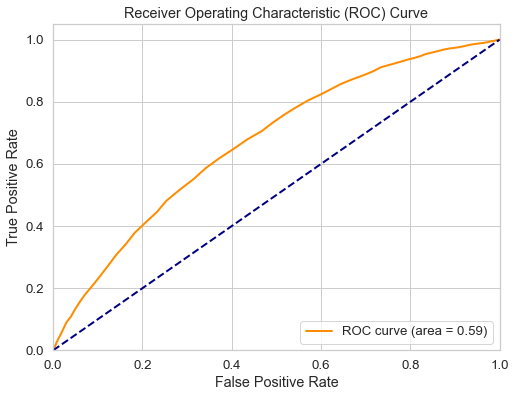

In [146]:
#taking probabilites
probs_log = log.predict_proba(X_test_scaled)[:, 1]
#rounding probabilites
probs_log = np.round(probs_log, 2)
#finding fpr, tpr-
'''
False Positive Rate (FPR):

FPR is a metric that measures the ratio of false positives to the total number of actual negatives
It quantifies how many of the instances that are actually negative (belonging to the negative class) were incorrectly predicted as positive by the model.
Formula: FPR = False Positives / (True Negatives + False Positives)

True Positive Rate (TPR), also known as Sensitivity or Recall:

TPR measures the ratio of true positives to the total number of actual positives
It quantifies how well the model correctly identifies instances that belong to the positive class.
Formula: TPR = True Positives / (True Positives + False Negatives)
'''
fpr, tpr, _ = roc_curve(y_test, probs_log)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, pred_log)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
'''
The line plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') is plotting a 
dashed diagonal line that goes from the point (0, 0) to the point (1, 1) with a navy blue color
and a linewidth of 2 units. This diagonal line is often used as a reference line in ROC curves to 
represent a scenario where the true positive rate (TPR) equals the false positive rate (FPR), essentially 
indicating random performance.
'''
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">XGBClassifier</p>


<h1>Why XGBOOST?</h1>

XGBoost can capture complex relationships between features and the target variable, even in cases where the relationship is not linear. It builds an ensemble of weak learners (usually decision trees) to create a strong predictive model.

XGBoost supports parallel and GPU computation, enabling faster training times on large datasets.

In [147]:
xgb=xgb.XGBClassifier()

In [148]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [149]:
xgb_preds=xgb.predict(X_test_scaled)

ROC AUC Score: 0.6546393771448671


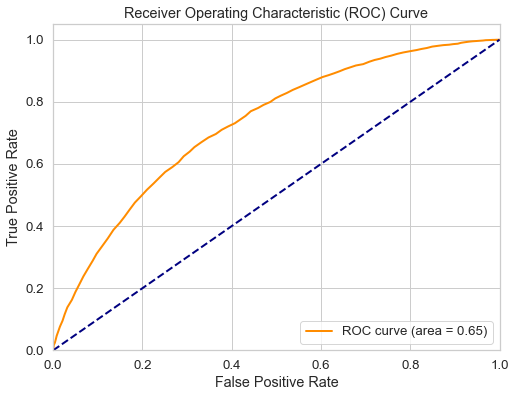

In [150]:
probs_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
probs_xgb = np.round(probs_xgb, 2)
fpr, tpr, _ = roc_curve(y_test, probs_xgb)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, xgb_preds)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [151]:
[evaluation_metrics(xgb, X_train_scaled, y_train, X_test_scaled, y_test, "XGBClassifier")]
results_df

Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.661208       0.664269   0.654459  0.664269   
1        XGBClassifier        0.823268       0.695599   0.687385  0.695599   

   F1-Score   ROC AUC  
0  0.627056  0.592357  
1  0.685780  0.654639

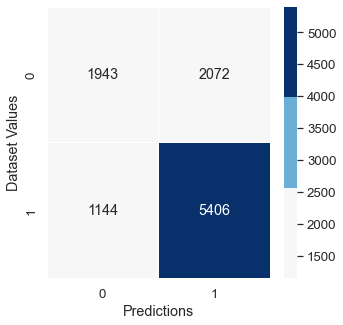

In [152]:
custom_colors = ['#f7f7f7', '#6baed6', '#08306b']
cm = confusion_matrix((y_test), xgb_preds)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax,cmap=custom_colors)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">XGBClassifier Bayesian Optimization</p>


<h1>Why bayesian optimization?</h1>

Bayesian optimization uses probabilistic models to predict how different hyperparameters are likely to affect the objective function. It adapts its search strategy based on past evaluations, focusing on promising regions of the hyperparameter space. This makes it more efficient in terms of the number of evaluations required to find optimal or near-optimal solutions.

In practice, the evaluation of the objective function can be noisy due to various factors. Bayesian optimization can handle noisy evaluations by modeling the uncertainty in predictions and making informed decisions about which hyperparameters to evaluate next.

In [153]:
# space = {
#     'learning_rate': hp.loguniform('learning_rate', -5, 0),
#     'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
#     'max_depth': hp.quniform('max_depth', 2, 10, 1),
#     'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
#     'subsample': hp.uniform('subsample', 0.5, 1),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
#     'gamma': hp.loguniform('gamma', -5, 0)
# }
'''
learning_rate: A hyperparameter that controls the step size at which the boosting algorithm converges to the optimal solution.
hp.loguniform('learning_rate', -5, 0) specifies a logarithmic uniform distribution between 10^-5 and 1 (inclusive).

n_estimators: The number of boosting rounds or trees. hp.quniform('n_estimators', 50, 300, 1) defines a discrete uniform 
distribution with integer values between 50 and 300 (inclusive).

max_depth: The maximum depth of a tree. hp.quniform('max_depth', 2, 10, 1) defines a discrete uniform distribution with 
integer values between 2 and 10 (inclusive).

min_child_weight: The minimum sum of instance weight (hessian) needed in a child. hp.quniform('min_child_weight', 1, 10, 1) 
defines a discrete uniform distribution with integer values between 1 and 10 (inclusive).

subsample: The fraction of samples used in each boosting round. hp.uniform('subsample', 0.5, 1) defines a uniform distribution 
between 0.5 and 1 (inclusive).

colsample_bytree: The fraction of features used in each boosting round. hp.uniform('colsample_bytree', 0.5, 1) defines a 
uniform distribution between 0.5 and 1 (inclusive).

gamma: A regularization term that controls the minimum reduction in the loss function required to make a further partition on a 
leaf node. hp.loguniform('gamma', -5, 0) specifies a logarithmic uniform distribution between 10^-5 and 1 (inclusive).
'''


# # Define the objective function
# def objective(params):
#     xgb_opt = XGBClassifier(
#         learning_rate=params['learning_rate'],
#         n_estimators=int(params['n_estimators']),
#         max_depth=int(params['max_depth']),
#         min_child_weight=int(params['min_child_weight']),
#         subsample=params['subsample'],
#         colsample_bytree=params['colsample_bytree'],
#         gamma=params['gamma']
#     )
#     score = cross_val_score(xgb_opt, X_train_scaled, y_train, cv=3, scoring='accuracy').mean()
#     return -score  # Minimize negative accuracy
'''
The reason for negating the score is that some optimization algorithms, like those in hyperopt, aim to minimize the 
objective function(loss). Since accuracy is something we want to maximize, returning the negation effectively converts it into 
a minimization problem.
'''
# # Perform Bayesian optimization
# trials = Trials()
# best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
'''
fn=objective: This specifies the objective function that you want to minimize. Objective is the name of the 
function that we defined to calculate the negative mean accuracy using cross-validation.

space=space: This specifies the hyperparameter search space. space is a dictionary or set of distributions that defines 
the range of values to explore for each hyperparameter.

algo=tpe.suggest: This specifies the optimization algorithm to use. tpe.suggest stands for Tree-structured Parzen Estimator (TPE), 
which is a popular Bayesian optimization algorithm.

max_evals=100: This sets the maximum number of evaluations or iterations the optimization algorithm will perform. In this case, 
the algorithm will evaluate the objective function 100 times to search for the best hyperparameters.

trials=trials: This provides the trials object to keep track of the optimization process and results.
'''
# print("Best hyperparameters:", best)

'\nfn=objective: This specifies the objective function that you want to minimize. Objective is the name of the \nfunction that we defined to calculate the negative mean accuracy using cross-validation.\n\nspace=space: This specifies the hyperparameter search space. space is a dictionary or set of distributions that defines \nthe range of values to explore for each hyperparameter.\n\nalgo=tpe.suggest: This specifies the optimization algorithm to use. tpe.suggest stands for Tree-structured Parzen Estimator (TPE), \nwhich is a popular Bayesian optimization algorithm.\n\nmax_evals=100: This sets the maximum number of evaluations or iterations the optimization algorithm will perform. In this case, \nthe algorithm will evaluate the objective function 100 times to search for the best hyperparameters.\n\ntrials=trials: This provides the trials object to keep track of the optimization process and results.\n'

In [154]:
# best['n_estimators'] = int(best['n_estimators'])
# best['max_depth'] = int(best['max_depth'])

In [155]:
# with open('params_xgb.pkl', 'wb') as f:
#     pickle.dump(best, f)

In [156]:
with open('params_xgb.pkl', 'rb') as f:
    best = pickle.load(f)

In [157]:
xgb_opt = XGBClassifier(**best)
xgb_opt.fit(X_train_scaled, y_train)
xgb_opt_preds = xgb_opt.predict(X_test_scaled)
print("Predictions have finished")

Predictions have finished


ROC AUC Score: 0.6641732814921145


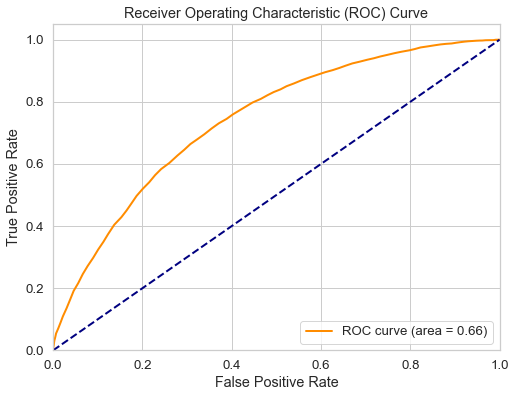

In [158]:
probs_xgb_opt = xgb_opt.predict_proba(X_test_scaled)[:, 1]
probs_xgb_opt = np.round(probs_xgb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_xgb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, xgb_opt_preds)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [159]:
[evaluation_metrics(xgb_opt, X_train_scaled, y_train, X_test_scaled, y_test, "XGBClassifier after Bayesian Optimization")]
results_df

Model  Train Accuracy  Test Accuracy  \
0                        Logistic Regression        0.661208       0.664269   
1                              XGBClassifier        0.823268       0.695599   
2  XGBClassifier after Bayesian Optimization        0.753692       0.707241   

   Precision    Recall  F1-Score   ROC AUC  
0   0.654459  0.664269  0.627056  0.592357  
1   0.687385  0.695599  0.685780  0.654639  
2   0.700083  0.707241  0.696156  0.664173

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">XGBClassifier Grid Search</p>


In [160]:
# param_grid={'max_depth':[10,30,50],
#        'min_child_weight':[1,3,6],
#        "n_estimators":[200],
#        "learning_rate":[0.05,0.1,0.16]}

'''
max_depth: This hyperparameter specifies the maximum depth of each decision tree in the ensemble. A higher value allows the 
tree to learn more complex patterns but may lead to overfitting.

min_child_weight: This hyperparameter defines the minimum sum of instance weight required in a child node. It can be used to
control the tree's depth and prevent nodes with very small samples.

n_estimators: This hyperparameter sets the number of boosting rounds or trees in the ensemble. More trees can lead to 
better model performance, but there's a trade-off with computation time.

learning_rate: Also known as the "eta" parameter, this hyperparameter determines the step size at which the boosting 
algorithm adapts during each iteration. A lower learning rate often requires more boosting rounds to converge, but it can 
improve model generalization.
'''

'\nmax_depth: This hyperparameter specifies the maximum depth of each decision tree in the ensemble. A higher value allows the \ntree to learn more complex patterns but may lead to overfitting.\n\nmin_child_weight: This hyperparameter defines the minimum sum of instance weight required in a child node. It can be used to\ncontrol the tree\'s depth and prevent nodes with very small samples.\n\nn_estimators: This hyperparameter sets the number of boosting rounds or trees in the ensemble. More trees can lead to \nbetter model performance, but there\'s a trade-off with computation time.\n\nlearning_rate: Also known as the "eta" parameter, this hyperparameter determines the step size at which the boosting \nalgorithm adapts during each iteration. A lower learning rate often requires more boosting rounds to converge, but it can \nimprove model generalization.\n'

In [161]:
# model=XGBClassifier()
# grid=GridSearchCV(model,param_grid=param_grid,cv=3,verbose=10,n_jobs=-1)
'''
 verbose=10: We'll see quite detailed output during the grid search process. This output will include information about the 
 current iteration, the hyperparameters being tested, the cross-validation results, and more.
 
 n_jobs=-1: This setting utilizes all available CPU cores for parallel execution. It is particularly useful if you 
 have a multicore CPU, as it can significantly speed up the grid search process by evaluating multiple combinations concurrently.
'''

"\n verbose=10: We'll see quite detailed output during the grid search process. This output will include information about the \n current iteration, the hyperparameters being tested, the cross-validation results, and more.\n \n n_jobs=-1: This setting utilizes all available CPU cores for parallel execution. It is particularly useful if you \n have a multicore CPU, as it can significantly speed up the grid search process by evaluating multiple combinations concurrently.\n"

In [162]:
# grid.fit(X_train_scaled,y_train)

In [163]:
# params=grid.best_params_

In [164]:
# with open('params_xgb_grid.pkl', 'wb') as f:
#     pickle.dump(params, f)

In [165]:
with open('params_xgb_grid.pkl', 'rb') as f:
    params = pickle.load(f)

In [166]:
grid_xgb = XGBClassifier(**params)  
grid_xgb.fit(X_train_scaled,y_train)
y_pred=grid_xgb.predict(X_test_scaled)

ROC AUC Score: 0.6638478796117612


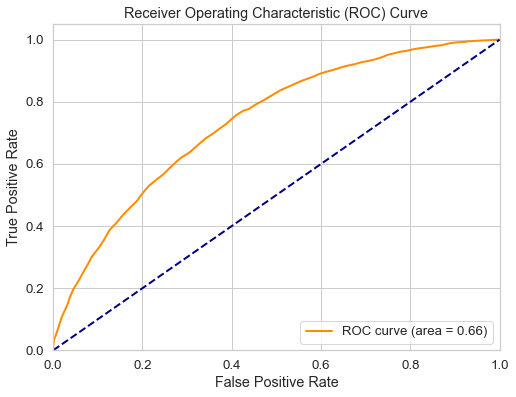

In [167]:
probs_xgb_opt = grid_xgb.predict_proba(X_test_scaled)[:, 1]
probs_xgb_opt = np.round(probs_xgb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_xgb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [168]:
[evaluation_metrics(grid_xgb, X_train_scaled, y_train, X_test_scaled, y_test, "XGBClassifier after Grid Search")]
results_df

Model  Train Accuracy  Test Accuracy  \
0                        Logistic Regression        0.661208       0.664269   
1                              XGBClassifier        0.823268       0.695599   
2  XGBClassifier after Bayesian Optimization        0.753692       0.707241   
3            XGBClassifier after Grid Search        0.878147       0.706957   

   Precision    Recall  F1-Score   ROC AUC  
0   0.654459  0.664269  0.627056  0.592357  
1   0.687385  0.695599  0.685780  0.654639  
2   0.700083  0.707241  0.696156  0.664173  
3   0.699770  0.706957  0.695847  0.663848

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Gradient Boosting</p>


<h2>Why Gradient Boosting?</h2>

 Gradient Boosting is capable of capturing complex relationships in data. If the dataset dataset has intricate interactions and patterns that other algorithms struggle to capture, Gradient Boosting might be a good choice.
 
 Gradient Boosting is an ensemble method that combines multiple weak learners (usually decision trees) to create a strong learner. This often results in improved performance.

Gradient Boosting can handle outliers in the data by giving less weight to them during the fitting process.

If the dataset has imbalanced classes, Gradient Boosting can be configured to give more weight to the minority class, helping improve prediction for the rare class.

In [169]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
gb_predictions = gb.predict(X_test_scaled)
print("Predictions have finished")

Predictions have finished


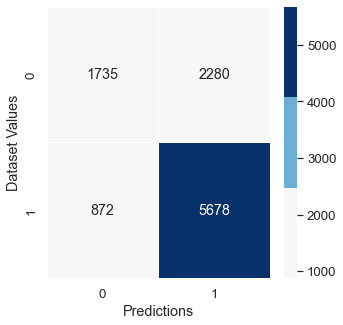

In [170]:
cm = confusion_matrix((y_test), gb_predictions)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "white", fmt =".0f", ax = ax,cmap=custom_colors)
plt.xlabel("Predictions")
plt.ylabel("Dataset Values")
plt.show()

ROC AUC Score: 0.6494998716644643


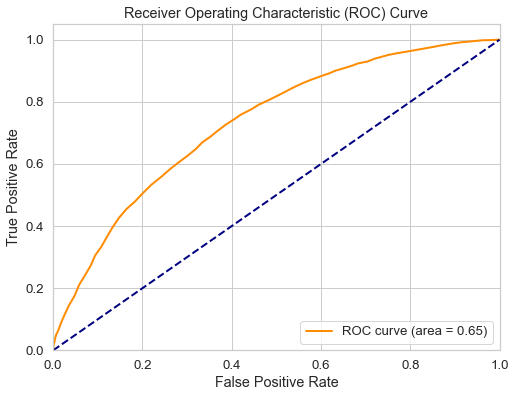

In [171]:
probs = gb.predict_proba(X_test_scaled)[:, 1]
probs = np.round(probs, 2)
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, gb_predictions)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [172]:
[evaluation_metrics(gb, X_train_scaled, y_train, X_test_scaled, y_test, "Gradient Boosting")]
results_df

Model  Train Accuracy  Test Accuracy  \
0                        Logistic Regression        0.661208       0.664269   
1                              XGBClassifier        0.823268       0.695599   
2  XGBClassifier after Bayesian Optimization        0.753692       0.707241   
3            XGBClassifier after Grid Search        0.878147       0.706957   
4                          Gradient Boosting        0.704302       0.701656   

   Precision    Recall  F1-Score   ROC AUC  
0   0.654459  0.664269  0.627056  0.592357  
1   0.687385  0.695599  0.685780  0.654639  
2   0.700083  0.707241  0.696156  0.664173  
3   0.699770  0.706957  0.695847  0.663848  
4   0.695262  0.701656  0.684416  0.649500

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Bayesian Optimization for GB</p>


In [173]:
# space = {
#     'learning_rate': hp.loguniform('learning_rate', -5, 0),
#     'n_estimators': hp.quniform('n_estimators', 50, 300, 1),  # Use hp.quniform to generate integer values
#     'max_depth': hp.quniform('max_depth', 2, 10, 1),
#     'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1)
# }
# # Defining the objective function
# def objective(params):
#     params['n_estimators'] = int(params['n_estimators'])  # Convert n_estimators to integer
#     params['max_depth'] = int(params['max_depth'])        # Convert max_depth to integer
#     clf = GradientBoostingClassifier(**params)
#     score = cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean()
#     return -score  # Minimize negative accuracy
# # Perform Bayesian optimization
# trials = Trials()
# best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# print("Best hyperparameters:", best)

In [174]:
# best['n_estimators'] = int(best['n_estimators'])
# best['max_depth'] = int(best['max_depth'])

In [175]:
# with open('params_fb_bayes.pkl', 'wb') as f:
#     pickle.dump(best, f)

In [176]:
with open('params_fb_bayes.pkl', 'rb') as f:
    best = pickle.load(f)

In [177]:
gb_opt = GradientBoostingClassifier(**best)
gb_opt.fit(X_train_scaled, y_train)
gb_predictions_opt = gb_opt.predict(X_test_scaled)

In [178]:
[evaluation_metrics(gb_opt, X_train_scaled, y_train, X_test_scaled, y_test, "Gradient Boosting after Bayesian Optimization")]
results_df

Model  Train Accuracy  \
0                            Logistic Regression        0.661208   
1                                  XGBClassifier        0.823268   
2      XGBClassifier after Bayesian Optimization        0.753692   
3                XGBClassifier after Grid Search        0.878147   
4                              Gradient Boosting        0.704302   
5  Gradient Boosting after Bayesian Optimization        0.619959   

   Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0       0.664269   0.654459  0.664269  0.627056  0.592357  
1       0.695599   0.687385  0.695599  0.685780  0.654639  
2       0.707241   0.700083  0.707241  0.696156  0.664173  
3       0.706957   0.699770  0.706957  0.695847  0.663848  
4       0.701656   0.695262  0.701656  0.684416  0.649500  
5       0.619972   0.384365  0.619972  0.474533  0.500000

# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">LightGBM Classifier</p>


<h1> Why LightGBM?</h1>

LightGBM is designed to be highly efficient and optimized for speed. It uses histogram-based learning, which can significantly reduce the time required to build trees, making it suitable for large datasets.

LightGBM can handle large datasets and can scale well to handle a high number of features and observations.

LightGBM is based on the gradient boosting algorithm, which is an ensemble learning method known for its ability to produce powerful predictive models by combining the predictions of multiple weaker models (typically decision trees).


In [179]:
model = lgb.LGBMClassifier()
model.fit(X_train_scaled, y_train)

LGBMClassifier()

In [180]:
preds_lgb=model.predict(X_test_scaled)

In [181]:
[evaluation_metrics(model, X_train_scaled, y_train, X_test_scaled, y_test, "LightGBM Classifier")]
results_df

Model  Train Accuracy  \
0                            Logistic Regression        0.661208   
1                                  XGBClassifier        0.823268   
2      XGBClassifier after Bayesian Optimization        0.753692   
3                XGBClassifier after Grid Search        0.878147   
4                              Gradient Boosting        0.704302   
5  Gradient Boosting after Bayesian Optimization        0.619959   
6                            LightGBM Classifier        0.749172   

   Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0       0.664269   0.654459  0.664269  0.627056  0.592357  
1       0.695599   0.687385  0.695599  0.685780  0.654639  
2       0.707241   0.700083  0.707241  0.696156  0.664173  
3       0.706957   0.699770  0.706957  0.695847  0.663848  
4       0.701656   0.695262  0.701656  0.684416  0.649500  
5       0.619972   0.384365  0.619972  0.474533  0.500000  
6       0.701467   0.693773  0.701467  0.688937  0.656095

ROC AUC Score: 0.656094797182322


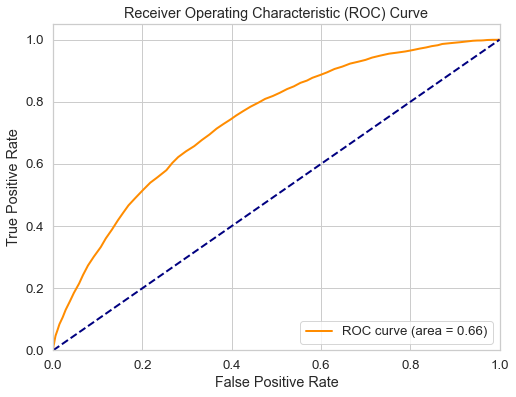

In [182]:
probs_xgb_opt = model.predict_proba(X_test_scaled)[:, 1]
probs_xgb_opt = np.round(probs_xgb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_xgb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, preds_lgb)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">LightGBM-Bayesian Optimization</p>


In [183]:
# param = {
#     'boosting_type': ['gbdt', 'dart', 'goss'],  # Different boosting types
#     'num_leaves': [20, 30, 40],  # Maximum number of leaves in one tree
#     'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
#     'n_estimators': [100, 200, 300],  # Number of boosting rounds (trees)
#     'max_depth': [3, 4, 5],  # Maximum depth of a tree
#     'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training data
#     'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
#     'reg_alpha': [0.0, 0.1, 0.2],  # L1 regularization term on weights
#     'reg_lambda': [0.0, 0.1, 0.2],  # L2 regularization term on weights
#     'min_child_samples': [20, 30, 40],  # Minimum number of data points in a leaf
#     'min_child_weight': [0.001, 0.01, 0.1],  # Minimum sum of instance weight (hessian) in one leaf
#     'silent': [True],  # Whether to print messages while running boosting
#     'random_state': [42]  # Random seed for reproducibility
# }

'''
boosting_type: Different types of boosting algorithms. Options are 'gbdt' (traditional Gradient Boosting), 
'dart' (Dropouts meet Multiple Additive Regression Trees), and 'goss' (Gradient-based One-Side Sampling).

num_leaves: Maximum number of leaves in one tree. Controls the complexity of the individual trees.

learning_rate: Step size shrinkage used to prevent overfitting. A lower learning rate requires more boosting 
rounds to converge but can lead to better generalization.

n_estimators: Number of boosting rounds (trees) to be built.

max_depth: Maximum depth of a tree. Limits the depth of the individual trees.

subsample: Subsample ratio of the training data used to build trees. Helps prevent overfitting.

colsample_bytree: Subsample ratio of columns when constructing each tree. Controls the feature subsampling.

reg_alpha: L1 regularization term on weights. Helps prevent overfitting by adding a penalty for large weights.

reg_lambda: L2 regularization term on weights. Similar to reg_alpha but using the L2 norm.

min_child_samples: Minimum number of data points in a leaf. Controls the minimum size of the leaves.

min_child_weight: Minimum sum of instance weight (hessian) in one leaf. Another way to control leaf size.

silent: Whether to print messages while running boosting. In this case, set to True to suppress messages.

random_state: Random seed for reproducibility.
'''

"\nboosting_type: Different types of boosting algorithms. Options are 'gbdt' (traditional Gradient Boosting), \n'dart' (Dropouts meet Multiple Additive Regression Trees), and 'goss' (Gradient-based One-Side Sampling).\n\nnum_leaves: Maximum number of leaves in one tree. Controls the complexity of the individual trees.\n\nlearning_rate: Step size shrinkage used to prevent overfitting. A lower learning rate requires more boosting \nrounds to converge but can lead to better generalization.\n\nn_estimators: Number of boosting rounds (trees) to be built.\n\nmax_depth: Maximum depth of a tree. Limits the depth of the individual trees.\n\nsubsample: Subsample ratio of the training data used to build trees. Helps prevent overfitting.\n\ncolsample_bytree: Subsample ratio of columns when constructing each tree. Controls the feature subsampling.\n\nreg_alpha: L1 regularization term on weights. Helps prevent overfitting by adding a penalty for large weights.\n\nreg_lambda: L2 regularization term o

In [184]:
# lgb = lgb.LGBMClassifier()

In [185]:
# bayesian_search = BayesSearchCV(
#     estimator=lgb,
#     search_spaces=param,
#     n_iter=10,  # Number of iterations
#     scoring='roc_auc',
#     cv=3,  # Number of cross-validation folds
#     verbose=2,
#     n_jobs=-1  # Use all available CPU cores
# )

In [186]:
# bayesian_search.fit(X_train_scaled, y_train)

In [187]:
# print("Best Hyperparameters:", bayesian_search.best_params_)
# print("Best AUC Score:", bayesian_search.best_score_)

In [188]:
# params=bayesian_search.best_params_
# params

In [189]:
# with open('params.pkl', 'wb') as f:
#     pickle.dump(params, f)

In [190]:
with open('params.pkl', 'rb') as f:
    params = pickle.load(f)
params=dict(params)

In [191]:
lgb_model = lgb.LGBMClassifier(**params)

In [192]:
[evaluation_metrics(lgb_model, X_train_scaled, y_train, X_test_scaled, y_test, "LightGBM Classifier-Bayesian Optimization")]
results_df

Model  Train Accuracy  \
0                            Logistic Regression        0.661208   
1                                  XGBClassifier        0.823268   
2      XGBClassifier after Bayesian Optimization        0.753692   
3                XGBClassifier after Grid Search        0.878147   
4                              Gradient Boosting        0.704302   
5  Gradient Boosting after Bayesian Optimization        0.619959   
6                            LightGBM Classifier        0.749172   
7      LightGBM Classifier-Bayesian Optimization        0.749030   

   Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0       0.664269   0.654459  0.664269  0.627056  0.592357  
1       0.695599   0.687385  0.695599  0.685780  0.654639  
2       0.707241   0.700083  0.707241  0.696156  0.664173  
3       0.706957   0.699770  0.706957  0.695847  0.663848  
4       0.701656   0.695262  0.701656  0.684416  0.649500  
5       0.619972   0.384365  0.619972  0.474533  0.500000  
6       0.701467   0.693773  0.701467  0.688937  0.656095  
7       0.708850   0.701944  0.708850  0.697227  0.664893

In [193]:
preds_lgb=lgb_model.predict(X_test_scaled)

ROC AUC Score: 0.6648926259351858


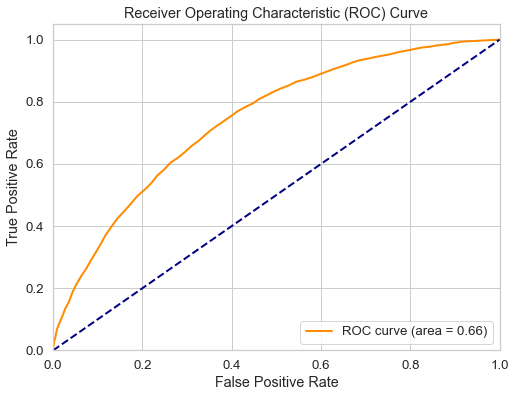

In [194]:
probs_lgb_opt = lgb_model.predict_proba(X_test_scaled)[:, 1]
probs_lgb_opt = np.round(probs_lgb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_lgb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, preds_lgb)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">CatBoost Classifier</p>


<h1>Why CatBoost?</h1>

CatBoost automatically performs feature scaling and reduces the need for manual feature engineering.

CatBoost's algorithms are optimized to work well with categorical features, making it effective for datasets with a mix of categorical and numerical variables.

CatBoost provides options to limit the depth and structure of individual trees, which can help prevent overfitting

In [195]:
model_catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', random_seed=42)

# Train the model
model_catboost.fit(X_train_scaled, y_train)

# Make predictions
predictions_catboost = model_catboost.predict(X_test_scaled)

0:	learn: 0.6782158	total: 182ms	remaining: 18s
1:	learn: 0.6675253	total: 218ms	remaining: 10.7s
2:	learn: 0.6580250	total: 249ms	remaining: 8.05s
3:	learn: 0.6497523	total: 267ms	remaining: 6.42s
4:	learn: 0.6429630	total: 284ms	remaining: 5.39s
5:	learn: 0.6373467	total: 323ms	remaining: 5.07s
6:	learn: 0.6323527	total: 345ms	remaining: 4.59s
7:	learn: 0.6279126	total: 365ms	remaining: 4.2s
8:	learn: 0.6236930	total: 384ms	remaining: 3.88s
9:	learn: 0.6205896	total: 400ms	remaining: 3.6s
10:	learn: 0.6181157	total: 415ms	remaining: 3.36s
11:	learn: 0.6155880	total: 431ms	remaining: 3.16s
12:	learn: 0.6132636	total: 447ms	remaining: 2.99s
13:	learn: 0.6111401	total: 464ms	remaining: 2.85s
14:	learn: 0.6097201	total: 480ms	remaining: 2.72s
15:	learn: 0.6079768	total: 496ms	remaining: 2.6s
16:	learn: 0.6062980	total: 512ms	remaining: 2.5s
17:	learn: 0.6051571	total: 528ms	remaining: 2.4s
18:	learn: 0.6037785	total: 543ms	remaining: 2.32s
19:	learn: 0.6025796	total: 558ms	remaining: 2.2

In [196]:
[evaluation_metrics(model_catboost, X_train_scaled, y_train, X_test_scaled, y_test, "CatBoost Classifier")]

0:	learn: 0.6782158	total: 25.9ms	remaining: 2.57s
1:	learn: 0.6675253	total: 45.2ms	remaining: 2.21s
2:	learn: 0.6580250	total: 62ms	remaining: 2s
3:	learn: 0.6497523	total: 77ms	remaining: 1.85s
4:	learn: 0.6429630	total: 93.8ms	remaining: 1.78s
5:	learn: 0.6373467	total: 111ms	remaining: 1.73s
6:	learn: 0.6323527	total: 128ms	remaining: 1.7s
7:	learn: 0.6279126	total: 143ms	remaining: 1.64s
8:	learn: 0.6236930	total: 159ms	remaining: 1.61s
9:	learn: 0.6205896	total: 177ms	remaining: 1.59s
10:	learn: 0.6181157	total: 192ms	remaining: 1.56s
11:	learn: 0.6155880	total: 209ms	remaining: 1.53s
12:	learn: 0.6132636	total: 225ms	remaining: 1.51s
13:	learn: 0.6111401	total: 241ms	remaining: 1.48s
14:	learn: 0.6097201	total: 256ms	remaining: 1.45s
15:	learn: 0.6079768	total: 272ms	remaining: 1.43s
16:	learn: 0.6062980	total: 288ms	remaining: 1.41s
17:	learn: 0.6051571	total: 306ms	remaining: 1.39s
18:	learn: 0.6037785	total: 321ms	remaining: 1.37s
19:	learn: 0.6025796	total: 335ms	remaining:

[None]

ROC AUC Score: 0.6509859021037522


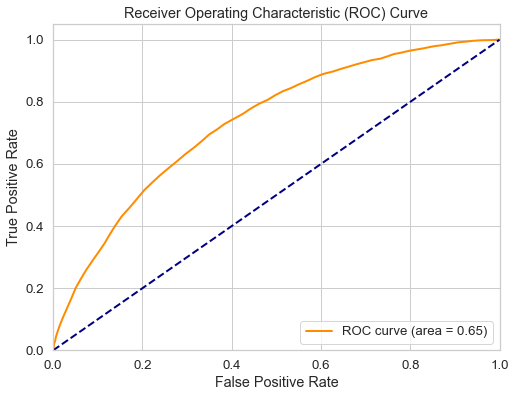

In [197]:
probs_cb_opt = model_catboost.predict_proba(X_test_scaled)[:, 1]
probs_cb_opt = np.round(probs_cb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_cb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, predictions_catboost)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [198]:
results_df

Model  Train Accuracy  \
0                            Logistic Regression        0.661208   
1                                  XGBClassifier        0.823268   
2      XGBClassifier after Bayesian Optimization        0.753692   
3                XGBClassifier after Grid Search        0.878147   
4                              Gradient Boosting        0.704302   
5  Gradient Boosting after Bayesian Optimization        0.619959   
6                            LightGBM Classifier        0.749172   
7      LightGBM Classifier-Bayesian Optimization        0.749030   
8                            CatBoost Classifier        0.709935   

   Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0       0.664269   0.654459  0.664269  0.627056  0.592357  
1       0.695599   0.687385  0.695599  0.685780  0.654639  
2       0.707241   0.700083  0.707241  0.696156  0.664173  
3       0.706957   0.699770  0.706957  0.695847  0.663848  
4       0.701656   0.695262  0.701656  0.684416  0.649500  
5       0.619972   0.384365  0.619972  0.474533  0.500000  
6       0.701467   0.693773  0.701467  0.688937  0.656095  
7       0.708850   0.701944  0.708850  0.697227  0.664893  
8       0.701467   0.694571  0.701467  0.685456  0.650986


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">RandomForest Classifier</p>


<h1> Why RandomForest Classifier</h1>

Random Forest is an ensemble method that combines the predictions of multiple decision trees to make more accurate and robust predictions. This ensemble approach can help reduce overfitting and improve generalization.

Random Forest provides a measure of feature importance, allowing you to identify which features have the most impact on predictions. This information can be useful for feature selection and understanding the data.

 The random selection of features and data subsets during tree construction reduces the risk of overfitting compared to a 
 single decision tree.

In [199]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Train the model
model_rf.fit(X_train_scaled, y_train)
# Make predictions
predictions_rf = model_rf.predict(X_test_scaled)

ROC AUC Score: 0.6509859021037522


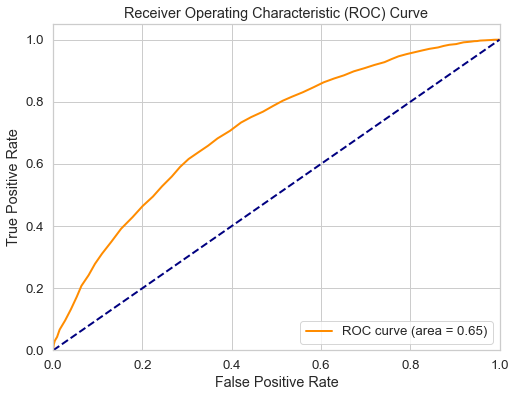

In [200]:
probs_rf_opt = model_rf.predict_proba(X_test_scaled)[:, 1]
probs_rf_opt = np.round(probs_rf_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_rf_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, predictions_catboost)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [201]:
[evaluation_metrics(model_rf, X_train_scaled, y_train, X_test_scaled, y_test, "RandomForest Classifier")]
results_df

Model  Train Accuracy  \
0                            Logistic Regression        0.661208   
1                                  XGBClassifier        0.823268   
2      XGBClassifier after Bayesian Optimization        0.753692   
3                XGBClassifier after Grid Search        0.878147   
4                              Gradient Boosting        0.704302   
5  Gradient Boosting after Bayesian Optimization        0.619959   
6                            LightGBM Classifier        0.749172   
7      LightGBM Classifier-Bayesian Optimization        0.749030   
8                            CatBoost Classifier        0.709935   
9                        RandomForest Classifier        0.759513   

   Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0       0.664269   0.654459  0.664269  0.627056  0.592357  
1       0.695599   0.687385  0.695599  0.685780  0.654639  
2       0.707241   0.700083  0.707241  0.696156  0.664173  
3       0.706957   0.699770  0.706957  0.695847  0.663848  
4       0.701656   0.695262  0.701656  0.684416  0.649500  
5       0.619972   0.384365  0.619972  0.474533  0.500000  
6       0.701467   0.693773  0.701467  0.688937  0.656095  
7       0.708850   0.701944  0.708850  0.697227  0.664893  
8       0.701467   0.694571  0.701467  0.685456  0.650986  
9       0.682158   0.674794  0.682158  0.655581  0.619508

### Overall, the models that seem to be performing well are the XGBClassifier after Bayesian Optimization, LightGBM Classifier, and LightGBM Classifier with Bayesian Optimization. These models have decent test accuracies and relatively small gaps between train and test accuracies. 

<h3>Performing cross-validation to ensure that our model's performance is consistent across different subsets of the data


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Cross validation</p>


In [202]:
df.target.value_counts()

1    32747
0    20074
Name: target, dtype: int64

In [203]:
y_train.value_counts()

1    26197
0    16059
Name: target, dtype: int64

### Data has a little imbalance so I will use StratifiedKFold for handling this

In [204]:
xgb_opt

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8328426281340751, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05226653519131612, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0848570974689761, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=8.0, missing=nan, monotone_constraints=None,
              n_estimators=217, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [205]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cross_val_scores = cross_val_score(xgb_opt, X_train_scaled, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-validation accuracy scores: [0.7008992  0.70027216 0.70429535 0.70252041 0.6923441 ]
Mean Accuracy: 0.7000662430672003


### Which indicates that xgb_opt's able to correctly classify about 70% of the instances on average across different cross-validation folds.

In [206]:
lgb_model

LGBMClassifier(colsample_bytree=0.8, max_depth=4, min_child_samples=30,
               min_child_weight=0.1, n_estimators=300, num_leaves=20,
               random_state=42, reg_lambda=0.1, silent=True)

In [207]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cross_val_scores = cross_val_score(lgb_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-validation accuracy scores: [0.70267392 0.70263874 0.69897054 0.70145545 0.69684061]
Mean Accuracy: 0.7005158519956612


### Which indicates that lgb_model's able to correctly classify about 70% of the instances on average across different cross-validation folds.

In [208]:
model

LGBMClassifier()

In [209]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-validation accuracy scores: [0.70267392 0.704887   0.69991717 0.6971956  0.69968051]
Mean Accuracy: 0.7008708395710961


### Which indicates that model's able to correctly classify about 70% of the instances on average across different cross-validation folds.


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Feature Importances XGBoost(Bayesian)</p>


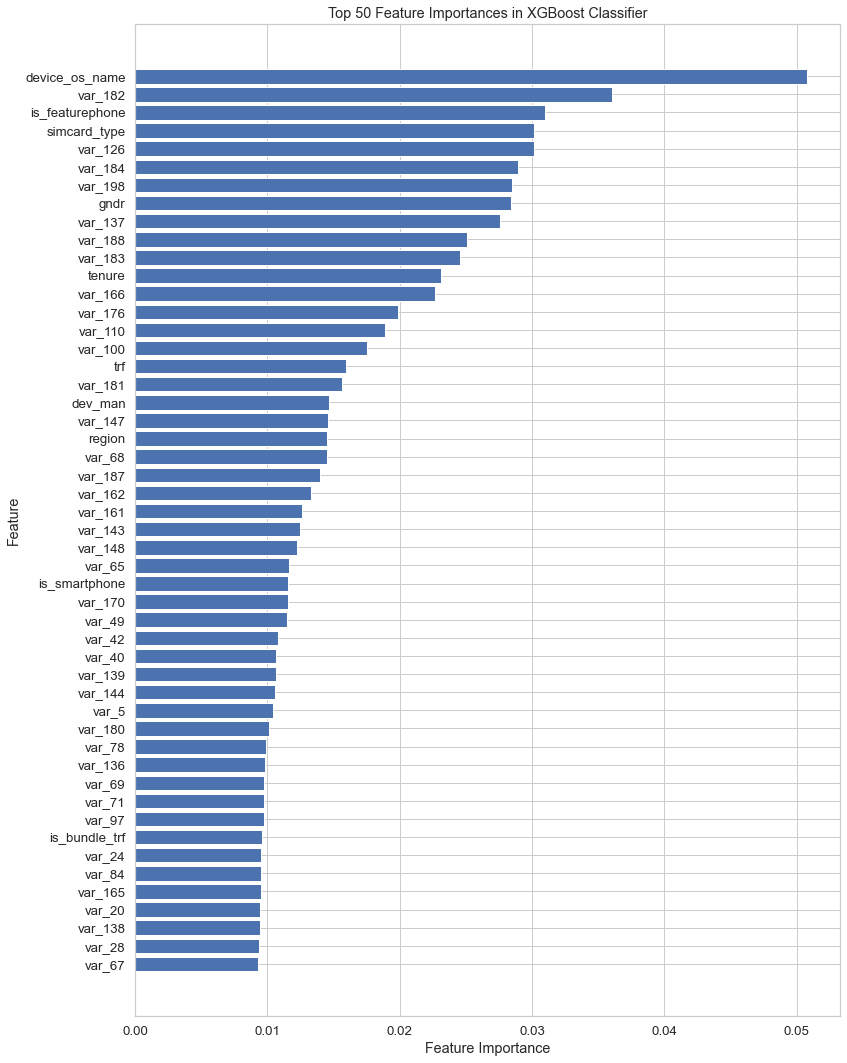

In [210]:
importances = xgb_opt.feature_importances_

# Get feature names and sort them along with their importances
feature_names = X.columns 
feature_importance_tuples = [(importance, feature_name) for importance, feature_name in zip(importances, feature_names)]
feature_importance_tuples.sort(reverse=True)

# Extract the top 50 features and their importances
top_feature_importance_tuples = feature_importance_tuples[:50]
top_feature_importances, top_feature_names = zip(*top_feature_importance_tuples)

# Create a bar plot to visualize the top 50 most important features
plt.figure(figsize=(12, 15))
plt.barh(top_feature_names, top_feature_importances, align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 50 Feature Importances in XGBoost Classifier")
plt.tight_layout()

# Invert the y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

In [211]:
top_feature_names

('device_os_name',
 'var_182',
 'is_featurephone',
 'simcard_type',
 'var_126',
 'var_184',
 'var_198',
 'gndr',
 'var_137',
 'var_188',
 'var_183',
 'tenure',
 'var_166',
 'var_176',
 'var_110',
 'var_100',
 'trf',
 'var_181',
 'dev_man',
 'var_147',
 'region',
 'var_68',
 'var_187',
 'var_162',
 'var_161',
 'var_143',
 'var_148',
 'var_65',
 'is_smartphone',
 'var_170',
 'var_49',
 'var_42',
 'var_40',
 'var_139',
 'var_144',
 'var_5',
 'var_180',
 'var_78',
 'var_136',
 'var_69',
 'var_71',
 'var_97',
 'is_bundle_trf',
 'var_24',
 'var_84',
 'var_165',
 'var_20',
 'var_138',
 'var_28',
 'var_67')

### So I will retrain model with those features

In [212]:
df[list(top_feature_names)]

device_os_name  var_182 is_featurephone  simcard_type  var_126  \
0                   0     2.20               0             1      0.0   
1                   0    10.23               0             2      0.0   
2                   0     0.00               0             1      0.0   
3                   0     5.94               0             0      2.0   
4                   0     0.00               0             1      0.0   
...               ...      ...             ...           ...      ...   
52830               0     0.55               0             1      0.0   
52831               5     0.00               1             0      0.0   
52832               0     0.00               0             1      0.0   
52833               0     0.00               0             0      0.0   
52834               0     0.00               0             1      0.0   

       var_184     var_198  gndr  var_137  var_188  var_183  tenure  var_166  \
0          0.0    0.220027     1      0.0     41.4      4.0  6384.0      4.8   
1         11.0    0.000000     1      0.0     15.3     14.0  6180.0      8.7   
2          0.0    1.112254     1      3.0     42.5      0.0  1534.0     15.8   
3          4.0    0.000000     1      0.0    225.4     20.0  3925.0    168.6   
4          0.0    0.000000     1      0.0      2.2      0.0   321.0      0.0   
...        ...         ...   ...      ...      ...      ...     ...      ...   
52830      0.0    3.052177     1      0.0     17.0      1.0  4939.0      0.0   
52831      0.0    0.000000     1      0.0    161.8      0.0  6028.0      0.3   
52832      0.0    0.025028     2      0.0      5.4      0.0  1567.0      0.3   
52833      0.0    0.000000     1      5.0     25.2      0.0  6524.0     19.5   
52834      0.4  395.345056     1      0.0      0.0      0.0   658.0      0.0   

          var_176  var_110  var_100  trf  var_181  dev_man  var_147  region  \
0        0.220027      0.0      0.0    2      0.0       18     0.29       1   
1        0.000000      0.0      0.0   16      0.0       18     0.00       0   
2        1.112254     92.0      0.0    0      5.0       18     0.06       1   
3        0.000000      0.0      0.0    2      3.0       23     2.73      35   
4        0.000000      0.0      0.0    0      0.0       18     2.34       7   
...           ...      ...      ...  ...      ...      ...      ...     ...   
52830    3.052177      0.0    104.0    2      0.0       23     0.27      29   
52831    0.000000      0.0      0.0    2      1.0       18     0.19      25   
52832    0.025028      0.0    166.0    3      6.0       23     0.16      48   
52833    0.000000      0.0      0.0    9     16.0       18     9.09       0   
52834  391.965507      0.0      0.0    9      0.0       23     0.00       7   

         var_68  var_187  var_162  var_161  var_143  var_148   var_65  \
0       1014.69    383.0      0.0      1.0     64.0     6.88   396.36   
1       9356.48    126.0     10.0      9.0      8.0     0.00    53.85   
2       3227.02    103.0      0.0      0.0      9.0     0.00  1913.52   
3          0.00    556.0      4.0      9.0     71.0     1.03     0.00   
4          0.00     29.0      0.0      0.0      2.0     0.28     0.00   
...         ...      ...      ...      ...      ...      ...      ...   
52830   1934.38     73.0      0.0      1.0      5.0     0.55   104.24   
52831      0.00    144.0      0.0      0.0     15.0     1.12     0.00   
52832   9220.52     88.0      0.0      0.0     28.0     0.02   958.56   
52833      0.00    112.0      0.0      0.0     19.0     6.93     0.00   
52834  17290.39     32.0      0.4      0.0     11.0     0.27   246.68   

      is_smartphone  var_170  var_49  var_42  var_40  var_139  var_144  \
0                 1    24.39     4.5     1.1   38.00      0.0      0.0   
1                 1     0.78    21.5     1.2   68.46      0.0      0.0   
2                 1     0.08     0.5     0.0    0.33      0.0      2.0   
3                 1     5.04    40.8     1.7  1

In [213]:
X = df[list(top_feature_names)]
y = df['target']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [215]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [216]:
with open('params_xgb.pkl', 'rb') as f:
    best = pickle.load(f)

In [217]:
xgb_opt = XGBClassifier(**best)
xgb_opt.fit(X_train_scaled, y_train)
xgb_opt_preds = xgb_opt.predict(X_test_scaled)
print("Predictions have finished")

Predictions have finished


ROC AUC Score: 0.6673192132556349


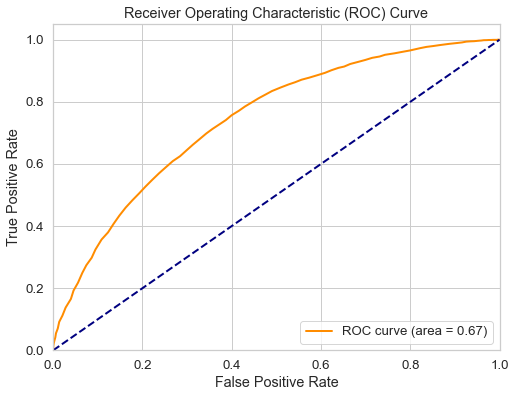

In [218]:
probs_xgb_opt = xgb_opt.predict_proba(X_test_scaled)[:, 1]
probs_xgb_opt = np.round(probs_xgb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_xgb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, xgb_opt_preds)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [219]:
[evaluation_metrics(xgb_opt, X_train_scaled, y_train, X_test_scaled, y_test, "XGBClassifier(Bayesian) after Feature Selection")]
results_df

Model  Train Accuracy  \
0                               Logistic Regression        0.661208   
1                                     XGBClassifier        0.823268   
2         XGBClassifier after Bayesian Optimization        0.753692   
3                   XGBClassifier after Grid Search        0.878147   
4                                 Gradient Boosting        0.704302   
5     Gradient Boosting after Bayesian Optimization        0.619959   
6                               LightGBM Classifier        0.749172   
7         LightGBM Classifier-Bayesian Optimization        0.749030   
8                               CatBoost Classifier        0.709935   
9                           RandomForest Classifier        0.759513   
10  XGBClassifier(Bayesian) after Feature Selection        0.753053   

    Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0        0.664269   0.654459  0.664269  0.627056  0.592357  
1        0.695599   0.687385  0.695599  0.685780  0.654639  
2        0.707241   0.700083  0.707241  0.696156  0.664173  
3        0.706957   0.699770  0.706957  0.695847  0.663848  
4        0.701656   0.695262  0.701656  0.684416  0.649500  
5        0.619972   0.384365  0.619972  0.474533  0.500000  
6        0.701467   0.693773  0.701467  0.688937  0.656095  
7        0.708850   0.701944  0.708850  0.697227  0.664893  
8        0.701467   0.694571  0.701467  0.685456  0.650986  
9        0.682158   0.674794  0.682158  0.655581  0.619508  
10       0.711500   0.704945  0.711500  0.699748  0.667319


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Feature Importances LightGBM(Bayesian)</p>


In [220]:
X=df.drop(columns='target')
y=df.target

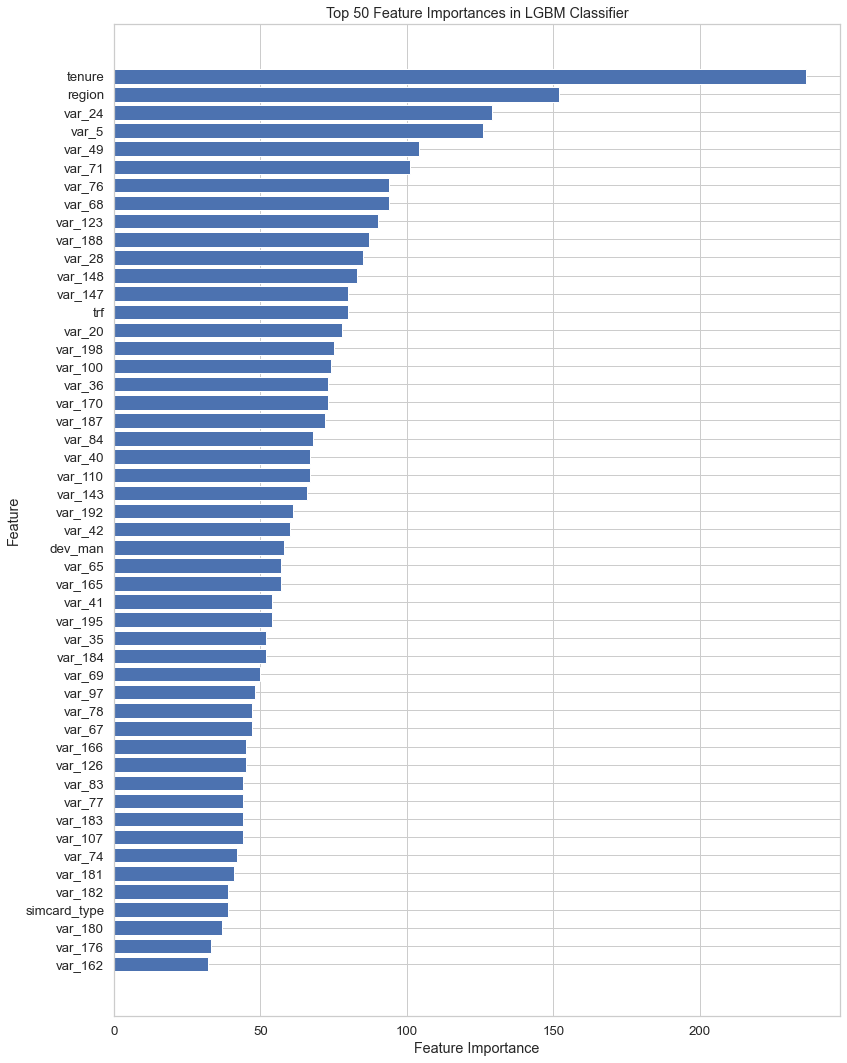

In [221]:
importances = lgb_model.feature_importances_

# Get feature names and sort them along with their importances
feature_names = X.columns
feature_importance_tuples = [(importance, feature_name) for importance, feature_name in zip(importances, feature_names)]
feature_importance_tuples.sort(reverse=True)

# Extract the top 50 features and their importances
top_feature_importance_tuples = feature_importance_tuples[:50]
top_feature_importances, top_feature_names = zip(*top_feature_importance_tuples)

# Create a bar plot to visualize the top 50 most important features
plt.figure(figsize=(12, 15))
plt.barh(top_feature_names, top_feature_importances, align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 50 Feature Importances in LGBM Classifier")
plt.tight_layout()

# Invert the y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

In [222]:
X = df[list(top_feature_names)]
y = df['target']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [224]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [225]:
with open('params.pkl', 'rb') as f:
    params = pickle.load(f)
params=dict(params)

In [226]:
lgb_model = lgb.LGBMClassifier(**params)

In [227]:
[evaluation_metrics(lgb_model, X_train_scaled, y_train, X_test_scaled, y_test, "LightGBM Classifier(Bayesian) after Feature Selection")]
results_df

Model  Train Accuracy  \
0                                 Logistic Regression        0.661208   
1                                       XGBClassifier        0.823268   
2           XGBClassifier after Bayesian Optimization        0.753692   
3                     XGBClassifier after Grid Search        0.878147   
4                                   Gradient Boosting        0.704302   
5       Gradient Boosting after Bayesian Optimization        0.619959   
6                                 LightGBM Classifier        0.749172   
7           LightGBM Classifier-Bayesian Optimization        0.749030   
8                                 CatBoost Classifier        0.709935   
9                             RandomForest Classifier        0.759513   
10    XGBClassifier(Bayesian) after Feature Selection        0.753053   
11  LightGBM Classifier(Bayesian) after Feature Se...        0.744628   

    Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0        0.664269   0.654459  0.664269  0.627056  0.592357  
1        0.695599   0.687385  0.695599  0.685780  0.654639  
2        0.707241   0.700083  0.707241  0.696156  0.664173  
3        0.706957   0.699770  0.706957  0.695847  0.663848  
4        0.701656   0.695262  0.701656  0.684416  0.649500  
5        0.619972   0.384365  0.619972  0.474533  0.500000  
6        0.701467   0.693773  0.701467  0.688937  0.656095  
7        0.708850   0.701944  0.708850  0.697227  0.664893  
8        0.701467   0.694571  0.701467  0.685456  0.650986  
9        0.682158   0.674794  0.682158  0.655581  0.619508  
10       0.711500   0.704945  0.711500  0.699748  0.667319  
11       0.702603   0.694964  0.702603  0.691001  0.658698

In [228]:
preds_lgb=lgb_model.predict(X_test_scaled)

ROC AUC Score: 0.6586977270350689


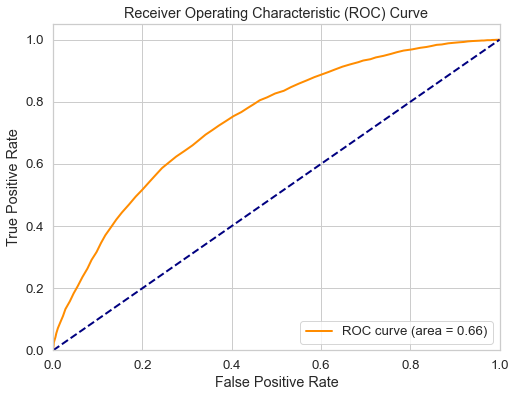

In [229]:
probs_lgb_opt = lgb_model.predict_proba(X_test_scaled)[:, 1]
probs_lgb_opt = np.round(probs_lgb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_lgb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, preds_lgb)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# <p style="padding:10px;background-color:#324459;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:400">Feature Importances LightGBM</p>


In [230]:
X=df.drop(columns='target')
y=df.target

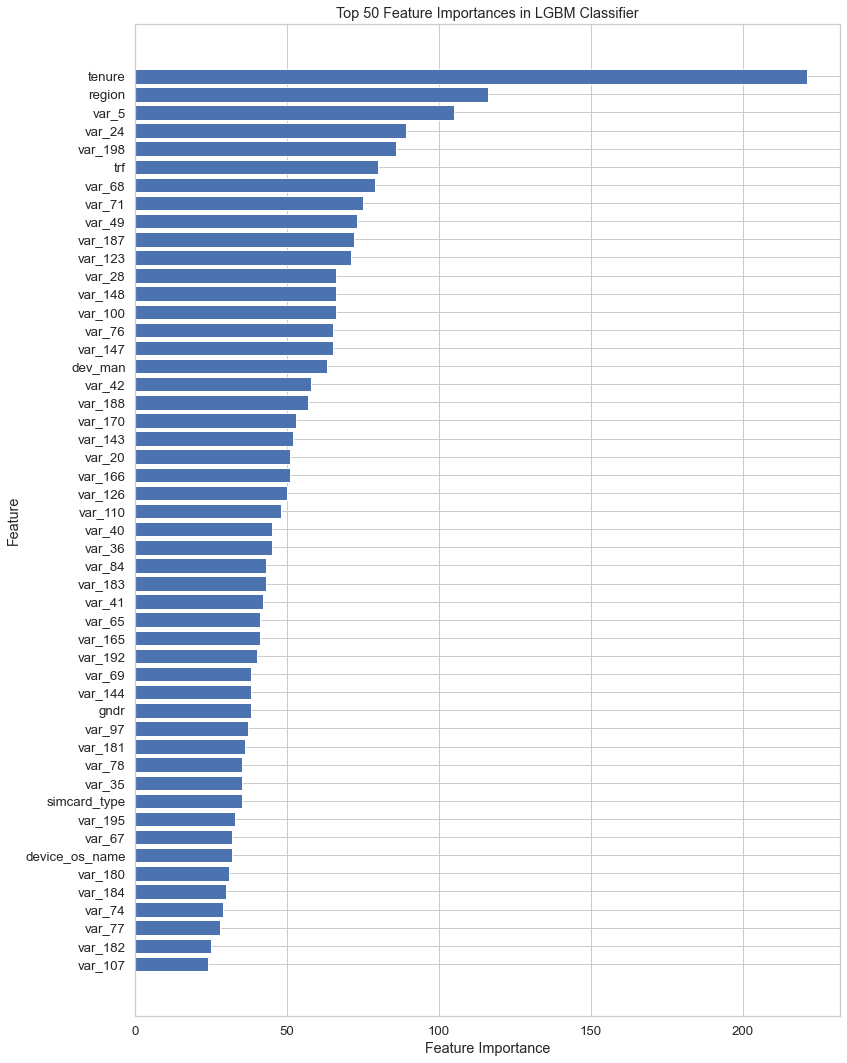

In [231]:
importances = model.feature_importances_

# Get feature names and sort them along with their importances
feature_names = X.columns
feature_importance_tuples = [(importance, feature_name) for importance, feature_name in zip(importances, feature_names)]
feature_importance_tuples.sort(reverse=True)

# Extract the top 50 features and their importances
top_feature_importance_tuples = feature_importance_tuples[:50]
top_feature_importances, top_feature_names = zip(*top_feature_importance_tuples)

# Create a bar plot to visualize the top 50 most important features
plt.figure(figsize=(12, 15))
plt.barh(top_feature_names, top_feature_importances, align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 50 Feature Importances in LGBM Classifier")
plt.tight_layout()

# Invert the y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

In [232]:
X = df[list(top_feature_names)]
y = df['target']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [234]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [235]:
model = lgb.LGBMClassifier()
model.fit(X_train_scaled, y_train)

LGBMClassifier()

In [236]:
preds_lgb=model.predict(X_test_scaled)

In [237]:
[evaluation_metrics(model, X_train_scaled, y_train, X_test_scaled, y_test, "LightGBM Classifier after Feature Selection")]
results_df

Model  Train Accuracy  \
0                                 Logistic Regression        0.661208   
1                                       XGBClassifier        0.823268   
2           XGBClassifier after Bayesian Optimization        0.753692   
3                     XGBClassifier after Grid Search        0.878147   
4                                   Gradient Boosting        0.704302   
5       Gradient Boosting after Bayesian Optimization        0.619959   
6                                 LightGBM Classifier        0.749172   
7           LightGBM Classifier-Bayesian Optimization        0.749030   
8                                 CatBoost Classifier        0.709935   
9                             RandomForest Classifier        0.759513   
10    XGBClassifier(Bayesian) after Feature Selection        0.753053   
11  LightGBM Classifier(Bayesian) after Feature Se...        0.744628   
12        LightGBM Classifier after Feature Selection        0.748367   

    Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0        0.664269   0.654459  0.664269  0.627056  0.592357  
1        0.695599   0.687385  0.695599  0.685780  0.654639  
2        0.707241   0.700083  0.707241  0.696156  0.664173  
3        0.706957   0.699770  0.706957  0.695847  0.663848  
4        0.701656   0.695262  0.701656  0.684416  0.649500  
5        0.619972   0.384365  0.619972  0.474533  0.500000  
6        0.701467   0.693773  0.701467  0.688937  0.656095  
7        0.708850   0.701944  0.708850  0.697227  0.664893  
8        0.701467   0.694571  0.701467  0.685456  0.650986  
9        0.682158   0.674794  0.682158  0.655581  0.619508  
10       0.711500   0.704945  0.711500  0.699748  0.667319  
11       0.702603   0.694964  0.702603  0.691001  0.658698  
12       0.705253   0.698113  0.705253  0.692357  0.659293

ROC AUC Score: 0.6592928236669741


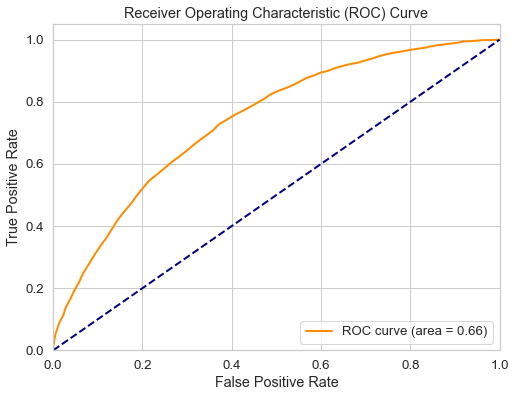

In [238]:
probs_xgb_opt = model.predict_proba(X_test_scaled)[:, 1]
probs_xgb_opt = np.round(probs_xgb_opt, 2)
fpr, tpr, _ = roc_curve(y_test, probs_xgb_opt)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, preds_lgb)
print("ROC AUC Score:", roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Sorting results based on their names

In [244]:
y_train.value_counts()

1    26197
0    16059
Name: target, dtype: int64

In [246]:
y_test.value_counts()

1    6550
0    4015
Name: target, dtype: int64

In [239]:
results_df = results_df.sort_values(by='Model')
results_df.reset_index(drop=True,inplace=True)

In [240]:
results_df

Model  Train Accuracy  \
0                                 CatBoost Classifier        0.709935   
1                                   Gradient Boosting        0.704302   
2       Gradient Boosting after Bayesian Optimization        0.619959   
3                                 LightGBM Classifier        0.749172   
4         LightGBM Classifier after Feature Selection        0.748367   
5   LightGBM Classifier(Bayesian) after Feature Se...        0.744628   
6           LightGBM Classifier-Bayesian Optimization        0.749030   
7                                 Logistic Regression        0.661208   
8                             RandomForest Classifier        0.759513   
9                                       XGBClassifier        0.823268   
10          XGBClassifier after Bayesian Optimization        0.753692   
11                    XGBClassifier after Grid Search        0.878147   
12    XGBClassifier(Bayesian) after Feature Selection        0.753053   

    Test Accuracy  Precision    Recall  F1-Score   ROC AUC  
0        0.701467   0.694571  0.701467  0.685456  0.650986  
1        0.701656   0.695262  0.701656  0.684416  0.649500  
2        0.619972   0.384365  0.619972  0.474533  0.500000  
3        0.701467   0.693773  0.701467  0.688937  0.656095  
4        0.705253   0.698113  0.705253  0.692357  0.659293  
5        0.702603   0.694964  0.702603  0.691001  0.658698  
6        0.708850   0.701944  0.708850  0.697227  0.664893  
7        0.664269   0.654459  0.664269  0.627056  0.592357  
8        0.682158   0.674794  0.682158  0.655581  0.619508  
9        0.695599   0.687385  0.695599  0.685780  0.654639  
10       0.707241   0.700083  0.707241  0.696156  0.664173  
11       0.706957   0.699770  0.706957  0.695847  0.663848  
12       0.711500   0.704945  0.711500  0.699748  0.667319

In [257]:
def highlight_row(row):
    if (row['Model']=='CatBoost Classifier') or (row['Model']=='Gradient Boosting') or (row['Model']=='LightGBM Classifier-Bayesian Optimization') or (row['Model']=='LightGBM Classifier after Feature Selection'):
        return ['background-color: yellow'] * len(row)
    elif (row['Model']=='XGBClassifier(Bayesian) after Feature Selection'):
        return ['background-color: pink'] * len(row)
    else:
        return [''] * len(row)
styled_df = results_df.style.apply(highlight_row, axis=1)
styled_df

Test Accuracy: This metric reflects the model's overall ability to make correct predictions. Models with higher test accuracy are generally preferred, as long as they don't overfit the data.

Precision and Recall: Precision measures the proportion of true positive predictions out of all positive predictions. Recall measures the proportion of true positive predictions out of all actual positives. Precision is important when minimizing false positives is crucial, while recall is important when minimizing false negatives is a priority.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall and is useful when you want to consider both false positives and false negatives.

ROC AUC: The Receiver Operating Characteristic Area Under the Curve (ROC AUC) measures the trade-off between true positive rate (recall) and false positive rate. A higher ROC AUC indicates a better model.

<h3>CatBoost Classifier:</h3>

Offers decent overall performance.

Achieves a test accuracy of 0.701467, showcasing competitiveness.

Balances precision and recall well, leading to a harmonious F1-score.

ROC AUC of 0.650986 indicates moderate discrimination ability.

<h3>Gradient Boosting:</h3>

Demonstrates performance akin to CatBoost, maintaining balanced metrics.

Attains a test accuracy of 0.701656.

Well-balanced precision and recall contribute to a solid F1-score.

<h3>Gradient Boosting after Bayesian Optimization:</h3>

Underperforms in terms of precision and F1-score compared to other models.

Relatively low ROC AUC of 0.500000 implies limited discrimination.

Overall performance is not on par with the majority of models.

<h3>LightGBM Classifier:</h3>

Displays strong performance across various metrics.

Balances precision and recall effectively.

Achieves a test accuracy of 0.701467.

F1-score and ROC AUC of 0.688937 and 0.656095, respectively, indicate robust performance.

<h3>LightGBM Classifier after Feature Selection:</h3>

Maintains performance similar to the standard LightGBM classifier.

Achieves a test accuracy of 0.705253.

Well-balanced precision and recall lead to a solid F1-score.

ROC AUC of 0.659293 suggests good discrimination ability.

<h3>LightGBM Classifier(Bayesian) after Feature Selection:</h3>

Similar performance to the regular LightGBM classifier, albeit with a slightly lower accuracy.

Achieves a test accuracy of 0.702603.

Precision, recall, F1-score, and ROC AUC maintain competitive levels.

<h3>LightGBM Classifier-Bayesian Optimization:</h3>

Demonstrates strong overall performance, particularly in precision, recall, F1-score, and ROC AUC.

Impressive test accuracy of 0.708850 suggests robustness.

<h3>Logistic Regression:</h3>

Shows lower performance compared to other models, particularly in terms of precision, recall, F1-score, and ROC AUC.

Attains a test accuracy of 0.664269.

<h3>RandomForest Classifier:</h3>

Achieves decent accuracy, but precision, recall, F1-score, and ROC AUC lag behind top-performing models.

Attains a test accuracy of 0.682158.

<h3>XGBClassifier:</h3>

Offers high accuracy and relatively balanced precision, recall, F1-score, and ROC AUC.

Attains a test accuracy of 0.695599.

<h3>XGBClassifier after Bayesian Optimization:</h3>

Demonstrates balanced metrics and solid overall performance.

Attains a test accuracy of 0.707241.

<h3>XGBClassifier after Grid Search:</h3>

Exhibits performance similar to the Bayesian optimized XGBClassifier.

Attains a test accuracy of 0.706957.

<h3>XGBClassifier(Bayesian) after Feature Selection:</h3>

Displays strong overall performance, akin to other variants of XGBClassifier.

Achieves a test accuracy of 0.711500.


<span style="color: blue; font-weight: bold;">[Link to GitHub](https://github.com/)</span>

